# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [3]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [4]:
# Import libraries to read and manipulate data
import pandas as pd
import numpy as np

# Import libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('white')
# to split the data into train and test
from sklearn.model_selection import train_test_split
# to build Linear regression model
from sklearn.linear_model import LinearRegression
# to build linear regression model using statsmodel
import statsmodels.api as sm
# to check the model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [5]:
# connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# load the dataset
recell_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [7]:
# display first few rows of data
recell_df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

In [8]:
# Checking the shape of the dataset (number of rows and columns in the data)
print(recell_df.shape)
print(f'The dataset has {recell_df.shape[0]} rows and {recell_df.shape[1]} columns.')

(3454, 15)
The dataset has 3454 rows and 15 columns.


In [9]:
# checking the datatypes of the columns in dataset
print(recell_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [10]:
# Statistical summary of dataset
recell_df.describe(include='all').T

count unique      top  freq         mean          std  \
brand_name               3454     34   Others   502          NaN          NaN   
os                       3454      4  Android  3214          NaN          NaN   
screen_size            3454.0    NaN      NaN   NaN    13.713115      3.80528   
4g                       3454      2      yes  2335          NaN          NaN   
5g                       3454      2       no  3302          NaN          NaN   
main_camera_mp         3275.0    NaN      NaN   NaN     9.460208     4.815461   
selfie_camera_mp       3452.0    NaN      NaN   NaN     6.554229     6.970372   
int_memory             3450.0    NaN      NaN   NaN    54.573099    84.972371   
ram                    3450.0    NaN      NaN   NaN     4.036122     1.365105   
battery                3448.0    NaN      NaN   NaN  3133.402697  1299.682844   
weight                 3447.0    NaN      NaN   NaN   182.751871    88.413228   
release_year           3454.0    NaN      NaN   NaN  2015.965258     2.298455   
days_used              3454.0    NaN      NaN   NaN   674.869716   248.580166   
normalized_used_price  3454.0    NaN      NaN   NaN     4.364712     0.588914   
normalized_new_price   3454.0    NaN      NaN   NaN     5.233107     0.683637   

                            min       25%       50%       75%       max  
brand_name                  NaN       NaN       NaN       NaN       NaN  
os                          NaN       NaN       NaN       NaN       NaN  
screen_size                5.08      12.7     12.83     15.34     30.71  
4g                          NaN       NaN       NaN       NaN       NaN  
5g                          NaN       NaN       NaN       NaN       NaN  
main_camera_mp             0.08       5.0       8.0      13.0      48.0  
selfie_camera_mp            0.0       2.0       5.0       8.0      32.0  
int_memory                 0.01      16.0      32.0      64.0    1024.0  
ram                        0.02       4.0       4.0       4.0      12.0  
battery                   500.0    2100.0    3000.0    4000.0    9720.0  
weight                     69.0     142.0     160.0     185.0     855.0  
release_year             2013.0    2014.0    2015.5    2018.0    2020.0  
days_used                  91.0     533.5     690.5    868.75    1094.0  
normalized_used_price  1.536867  4.033931  4.405133    4.7557  6.619433  
normalized_new_price   2.901422  4.790342  5.245892  5.673718  7.847841

In [11]:
# Checking for duplicate values

print(f'There are {recell_df.duplicated().sum()} duplicate values in the dataset')

There are 0 duplicate values in the dataset


In [12]:
# Checking for missing values

missing_values = recell_df.isnull().sum().sort_values(ascending = False)

if missing_values.any():
  print('There are missing values in the dataset','\n')
  print(missing_values)
else:
  print('There are no missing values in the dataset')
  print(missing_values)


There are missing values in the dataset 

main_camera_mp           179
weight                     7
battery                    6
int_memory                 4
ram                        4
selfie_camera_mp           2
brand_name                 0
4g                         0
5g                         0
os                         0
screen_size                0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64


**Observations:**

*   The dataset has 3454 rows and 15 columns.
*   There are 4 categorical data type columns and the remaining 11 columns data type are numerical
*    There are no duplicates in the dataset
*   We observe missing values in main_camera_mp,weight,battery,int_memory,ram,selfie_camera_mp.
*   There are 34 unique brands in the column (brand_name). The most popular brand name is in the Others category.
*   The most popular OS is Andriod among the available 4 unique categories
*   The maximum screen size is around 30 cm could be for tablets and minimum screen size is around 5 cm could be for phones.
*   Both 4g and 5g columns have yes or no values, majority of the devices (3302 out of 3454) do not support 5g, where as majority of devices (2335 out of 3454) support 4g.








## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

*1.What does the distribution of normalized used device prices look like?*

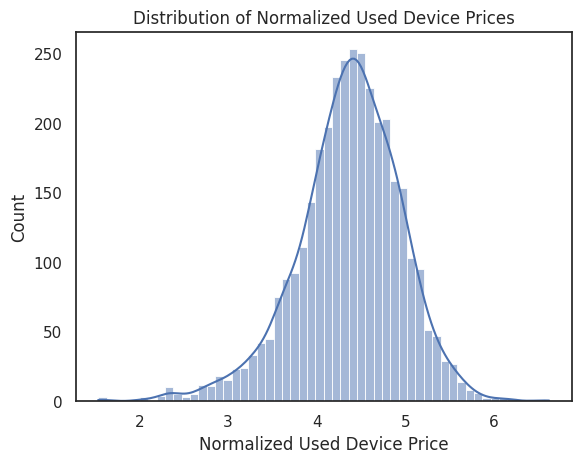

************************************************************************************************************************************************************************************************************************************************


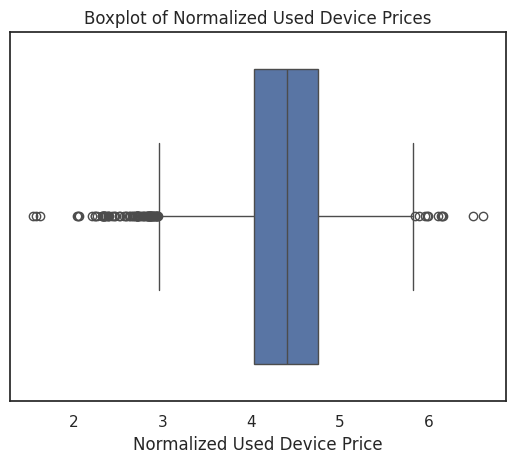

In [13]:
# plot the distribution of normalized used device price
sns.set_style('white')
sns.histplot(recell_df['normalized_used_price'], kde=True)
plt.title('Distribution of Normalized Used Device Prices')
plt.xlabel('Normalized Used Device Price')
plt.show()
print('************'*20)
## plot the boxplot for normalized used device price
sns.boxplot(recell_df['normalized_used_price'],orient = 'h')
plt.title('Boxplot of Normalized Used Device Prices')
plt.xlabel('Normalized Used Device Price')
plt.show()

***Answer:***
- We see distribution of normalized used device prices looks normally distributed having mean of 5.23 and median of 5.25.There are few outliers shown in the boxplot.

*2.What percentage of the used device market is dominated by Android devices?*

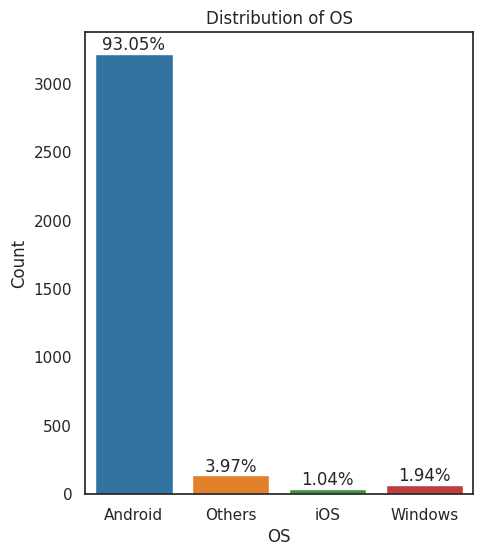


 Percentage of Andriod devices is 93.05%


In [14]:
# create the Countplot
plt.figure(figsize=(5, 6))
ax = sns.countplot(data = recell_df, x = 'os', hue = 'os',palette= 'tab10')
plt.title('Distribution of OS')
plt.xlabel('OS')
plt.ylabel('Count')

# Calculate total number of observations
total = len(recell_df['os'])

# to add percentage labels to the bars
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center' , va = 'bottom')

plt.show()

# print the percentage of Andriod devices
print('\n','Percentage of Andriod devices is', '{:.2f}%'.format(recell_df['os'].value_counts(normalize = True)['Android']*100))

***Answer:***

93.05% of the used device market is dominated by Android devices.

*3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?*

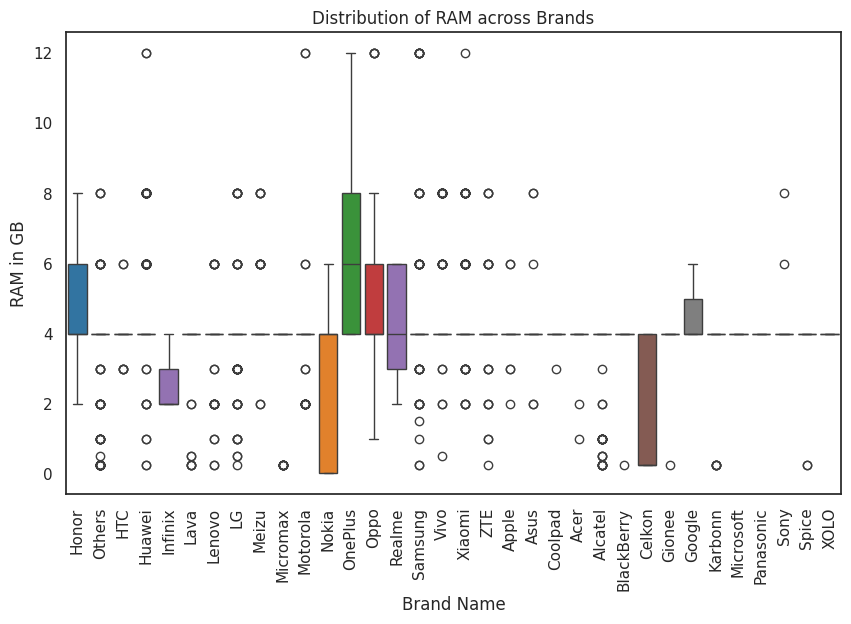

In [15]:
# create a boxplot to observe brand name and RAM
plt.figure(figsize=(10, 6))
sns.boxplot(data = recell_df, x = 'brand_name', y = 'ram', hue = 'brand_name', palette= 'tab10')
plt.title('Distribution of RAM across Brands')
plt.xlabel('Brand Name')
plt.ylabel('RAM in GB')
plt.xticks(rotation=90)
plt.show()

***Answer:***

- It shows the latest brands such as OnePlus has minumum 4 GB RAM and maximum 8GB RAM.
- Older brands typically have lower RAMs as seen with Infinix, Nokia, and Celkon.

*4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?*

In [16]:
# create a new dataframe for devices having large batteries (more than 4500 mAh)
recell_df_large_battery = recell_df[recell_df['battery'] > 4500]

#Check the shape of the dataframe for devices having large batteries (more than 4500 mAh)
print(recell_df_large_battery.shape)
# print the number of devices having large batteries (more than 4500 mAh)
print(f'There are {len(recell_df_large_battery)} devices having large batteries (more than 4500 mAh)')

(341, 15)
There are 341 devices having large batteries (more than 4500 mAh)


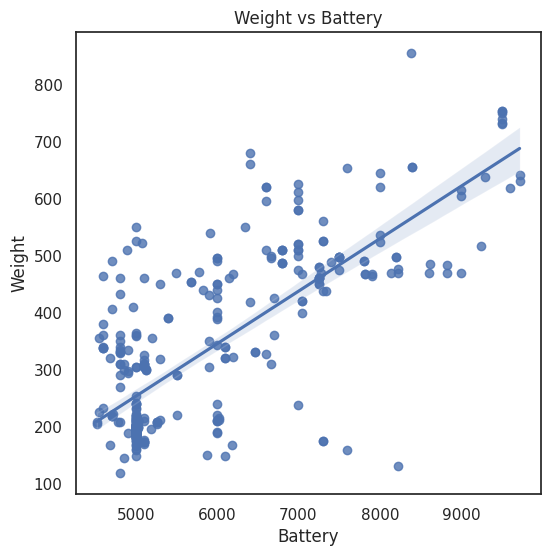

************************************************************************************************************************************************************************************************************************************************


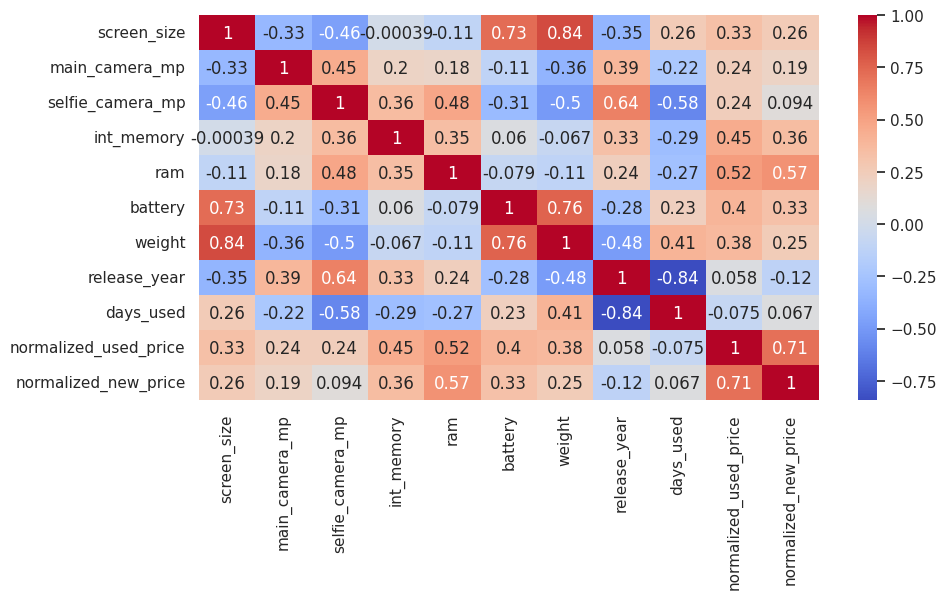


 Correlation between battery and weight: 0.76


In [17]:
# To view how weight vary for devices with large batteries (more than 4500 mAh)
plt.figure(figsize=(6, 6))
sns.regplot(data = recell_df_large_battery, x = 'battery', y = 'weight')
plt.title('Weight vs Battery')
plt.xlabel('Battery')
plt.ylabel('Weight')
plt.show()
print('************'*20)

# Select only numeric columns for correlation calculation
numerical_recell_df = recell_df_large_battery.select_dtypes(include=np.number)

# Heatmap to view the correlation between battery and weight
plt.figure(figsize=(10, 5))
sns.heatmap(numerical_recell_df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

# calculate the correlation between battery and weight
print('\n','Correlation between battery and weight:','{:.2f}'.format(numerical_recell_df['battery'].corr(numerical_recell_df['weight'])))

**Answer:**

- There are 341 devices with large batteries (more than 4500 mAh)
- The correlation between large batteries (more than 4500 mAh) and the weight is around 0.76,which means for each increase in battery size, the weight increases by 76%, this shows strong positive relation between these two variables.
- We also observe that few devices over 7000 mAh have less weight, could be data error.

*5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?*

In [18]:
# devices with a screen size larger than 6 inches
recell_df_large_screen = recell_df[recell_df['screen_size'] > 6 * 2.5]

# print the count of number of devices with a screen size larger than 6 inches
print(recell_df_large_screen.shape)
print(f"There are {recell_df_large_screen['screen_size'].value_counts().sum()} devices with a screen size larger than 6 inches")



(1259, 15)
There are 1259 devices with a screen size larger than 6 inches


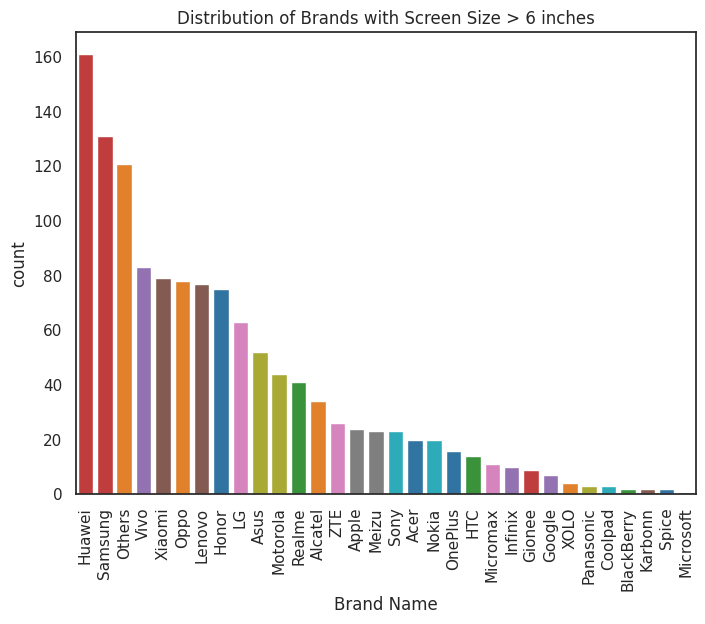

brand_name
Huawei        161
Samsung       131
Others        121
Vivo           83
Xiaomi         79
Oppo           78
Lenovo         77
Honor          75
LG             63
Asus           52
Motorola       44
Realme         41
Alcatel        34
ZTE            26
Apple          24
Meizu          23
Sony           23
Acer           20
Nokia          20
OnePlus        16
HTC            14
Micromax       11
Infinix        10
Gionee          9
Google          7
XOLO            4
Panasonic       3
Coolpad         3
BlackBerry      2
Karbonn         2
Spice           2
Microsoft       1
Name: count, dtype: int64


In [19]:
# countplot to view the distribution
plt.figure(figsize=(8, 6))
sns.countplot(data = recell_df_large_screen, x = 'brand_name',order = recell_df_large_screen['brand_name'].value_counts().index, hue = 'brand_name', palette= 'tab10')
plt.title('Distribution of Brands with Screen Size > 6 inches')
plt.xlabel('Brand Name')
plt.xticks(rotation=90)
plt.show()

# print the count of Brands with Screen Size > 6 inches
device_brand_name_count = recell_df_large_screen['brand_name'].value_counts()
print(device_brand_name_count)

*Answer:*

- There are 1259 devices having screen size more than 6 inches.
- The Huawei has the most devices with big screen size(around 161) followed by Samsung (around 131)
- There are around 121 large screen devices with no identifiable brand.

*6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?*

In [20]:
# devices having greater than 8MP selfie cameras
selfie_camera_greater_than_8mp = recell_df[recell_df['selfie_camera_mp'] > 8]
print(selfie_camera_greater_than_8mp.shape)
# print devices having greater than 8MP selfie cameras
print(f"There are {selfie_camera_greater_than_8mp['selfie_camera_mp'].value_counts().sum()} devices having greater than 8MP selfie cameras")

(655, 15)
There are 655 devices having greater than 8MP selfie cameras


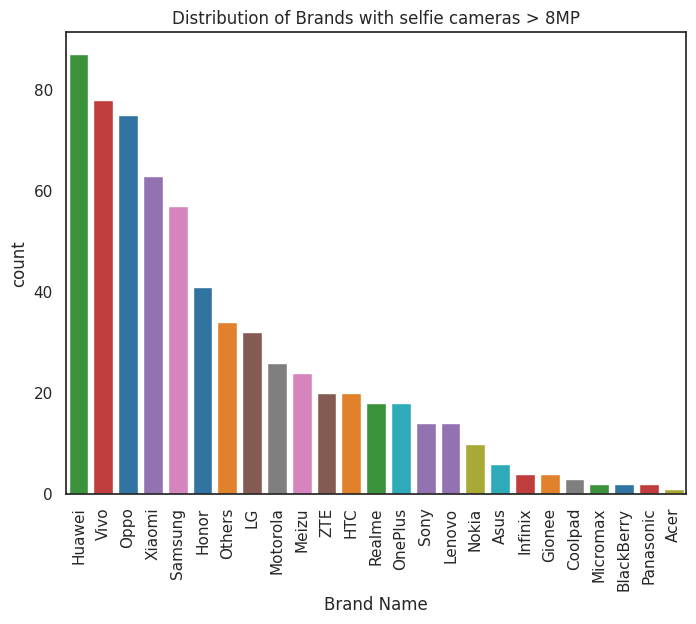

brand_name
Huawei        87
Vivo          78
Oppo          75
Xiaomi        63
Samsung       57
Honor         41
Others        34
LG            32
Motorola      26
Meizu         24
ZTE           20
HTC           20
Realme        18
OnePlus       18
Sony          14
Lenovo        14
Nokia         10
Asus           6
Infinix        4
Gionee         4
Coolpad        3
Micromax       2
BlackBerry     2
Panasonic      2
Acer           1
Name: count, dtype: int64


In [21]:
# countplot to view the distribution
plt.figure(figsize=(8, 6))
sns.countplot(data = selfie_camera_greater_than_8mp, x = 'brand_name',order = selfie_camera_greater_than_8mp['brand_name'].value_counts().index, hue = 'brand_name', palette= 'tab10')
plt.title('Distribution of Brands with selfie cameras > 8MP')
plt.xlabel('Brand Name')
plt.xticks(rotation=90)
plt.show()

# print the count of Brands having selfie camera > 8MP
device_brand_selfie_camera_count = selfie_camera_greater_than_8mp['brand_name'].value_counts()
print(device_brand_selfie_camera_count)

*Answer:*

- There are 655 devices equipped with selfie cameras exceeding 8MP.
- Huawei leads with approximately 87 devices equipped with selfie cameras exceeding 8MP followed by Vivo around 78 devices.

*7. Which attributes are highly correlated with the normalized price of a used device?*

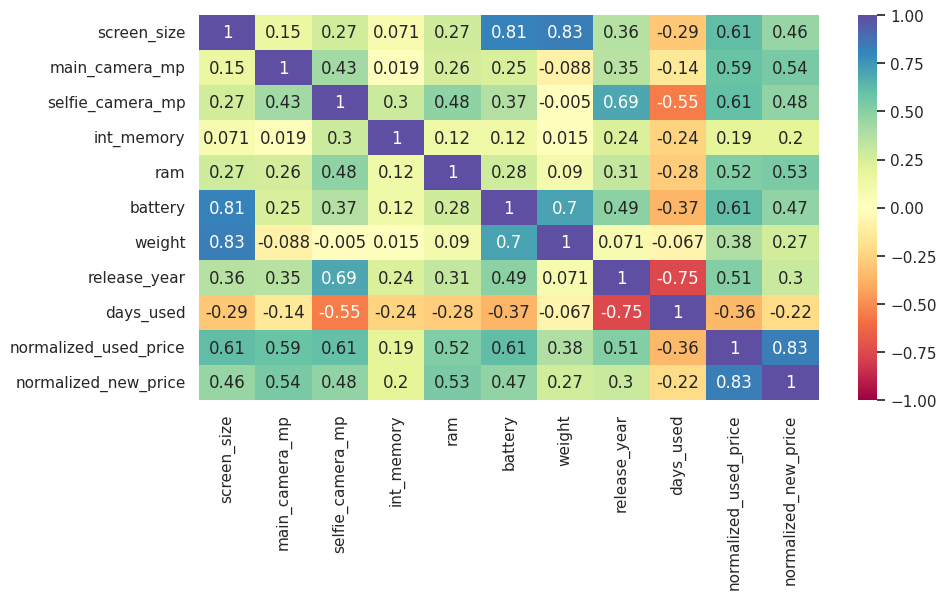

In [22]:
# Select only numeric columns for correlation calculation
recell_df_numerical = recell_df.select_dtypes(include=np.number)

# Heatmap to observe the correlation
plt.figure(figsize=(10, 5))
sns.heatmap(recell_df_numerical.corr(), annot = True, cmap = 'Spectral', vmax = 1, vmin = -1)
plt.show()

*Answer:*

The following exhibits a strong correlation:
- The normalized used price to the normalized new price is 83%.
- The normalized used price to the screen size is 61%.
- The normalized used price to main camera is 59%.
- The normalized used price to selfie camera is 61%
- The normalized used price to ram is 52%.
- The normalized used price to battery is 61%.
- The normalized used price to release year is 51%.

###Univariant Analysis###

#####Brand name#####

In [23]:
# print the brand count
count = recell_df['brand_name'].value_counts()
proportions = (recell_df['brand_name'].value_counts(True)*100).sort_values(ascending = False)
brand_count_df = pd.DataFrame({'Count': count , 'Proportions': proportions})
print(f'There are {brand_count_df.shape[0]} unique brands.','\n')
print(brand_count_df)

There are 34 unique brands. 

            Count  Proportions
brand_name                    
Others        502    14.533874
Samsung       341     9.872611
Huawei        251     7.266937
LG            201     5.819340
Lenovo        171     4.950782
ZTE           140     4.053272
Xiaomi        132     3.821656
Oppo          129     3.734800
Asus          122     3.532137
Alcatel       121     3.503185
Micromax      117     3.387377
Vivo          117     3.387377
Honor         116     3.358425
HTC           110     3.184713
Nokia         106     3.068906
Motorola      106     3.068906
Sony           86     2.489867
Meizu          62     1.795020
Gionee         56     1.621309
Acer           51     1.476549
XOLO           49     1.418645
Panasonic      47     1.360741
Realme         41     1.187030
Apple          39     1.129126
Lava           36     1.042270
Celkon         33     0.955414
Spice          30     0.868558
Karbonn        29     0.839606
BlackBerry     22     0.636943
OnePlus  

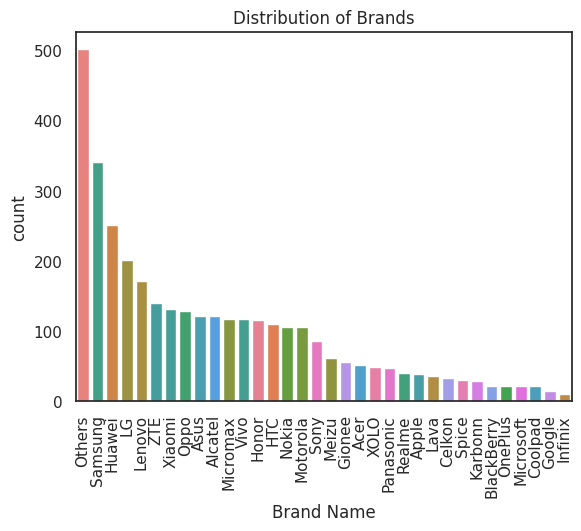

In [24]:
# countplot to view the distribution of brands
sns.countplot(data = recell_df, x = 'brand_name', order = recell_df['brand_name'].value_counts().index,hue = 'brand_name')
plt.title('Distribution of Brands')
plt.xlabel('Brand Name')
plt.xticks(rotation=90)
plt.show()

<font size = "-1">
Observation:
- There are 34 unique brand names in the dataset.Among them 502 devices(14.5%) fall under Others, while 341 are Samsung(9.9%),251 are Huawei(7.3%), 201 are LG(5.9%) and 171 are Lenovo(5%)

######OS#####

In [25]:
# print the OS count
OS_count = recell_df['os'].value_counts()
OS_proportions = (recell_df['os'].value_counts(True)*100).sort_values(ascending = False)
OS_count_df = pd.DataFrame({'Count': OS_count , 'Proportions': OS_proportions})
print(OS_count_df)

         Count  Proportions
os                         
Android   3214    93.051534
Others     137     3.966416
Windows     67     1.939780
iOS         36     1.042270


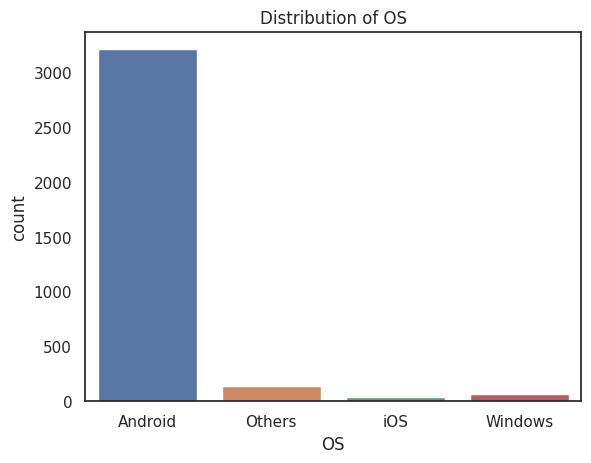

In [26]:
# countplot to view the distribution of OS
sns.countplot(data = recell_df, x = 'os',hue = 'os')
plt.title('Distribution of OS')
plt.xlabel('OS')
plt.show()

<font size = "-1">
Observation:

We observe Andriod has more distribution when compared to others,iOS,Windows OS.

#####Screen Size#####

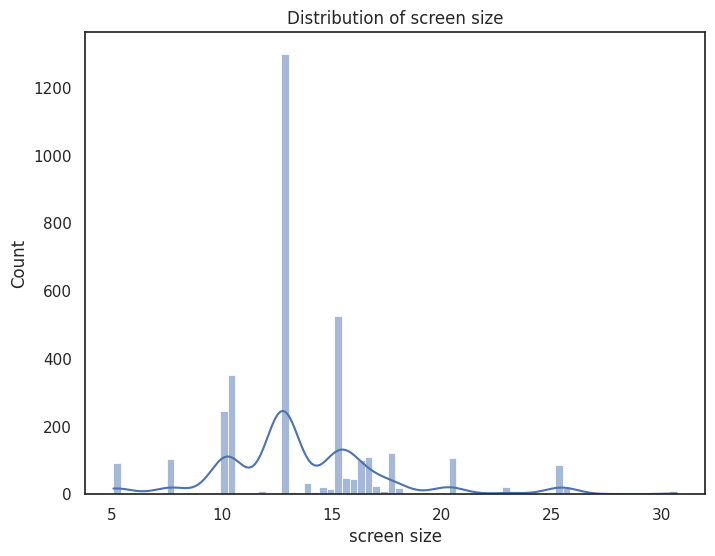

************************************************************************************************************************


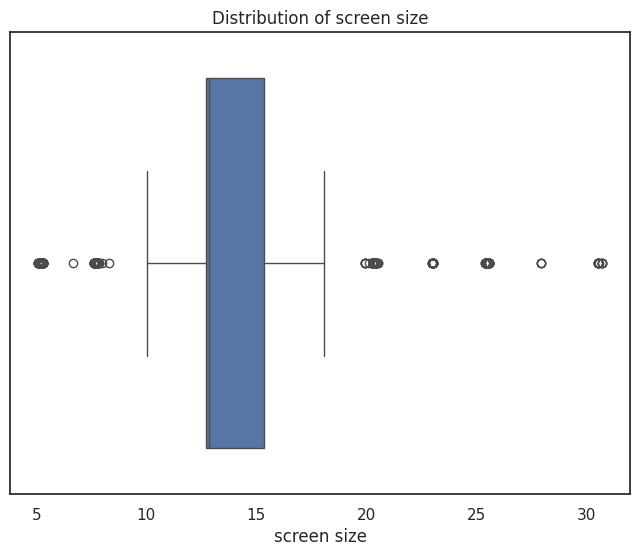

In [27]:
# histplot to view the distribution of screen size
plt.figure(figsize=(8, 6))
sns.histplot(data = recell_df, x = 'screen_size',kde = True)
plt.title('Distribution of screen size')
plt.xlabel('screen size')
plt.show()
print('******'*20)
# boxplot to understand the distribution of screen size
plt.figure(figsize=(8, 6))
sns.boxplot(data = recell_df, x = 'screen_size')
plt.title('Distribution of screen size')
plt.xlabel('screen size')
plt.show()

<font size = "-1">
Observation:

 - We observe from boxplot the maximum screensize is around 15 inches, this suggests 15 inch screens are widely preferred,also there are few outliers.

#####4G######

In [28]:
# print the values in 4g column
fourG_count = recell_df['4g'].value_counts()
fourG_proportion = (recell_df['4g'].value_counts(normalize = True)*100).sort_values(ascending = False)
fourG_count_df = pd.DataFrame({'Count': fourG_count , 'Proportions': fourG_proportion})
print(fourG_count_df)

     Count  Proportions
4g                     
yes   2335    67.602779
no    1119    32.397221


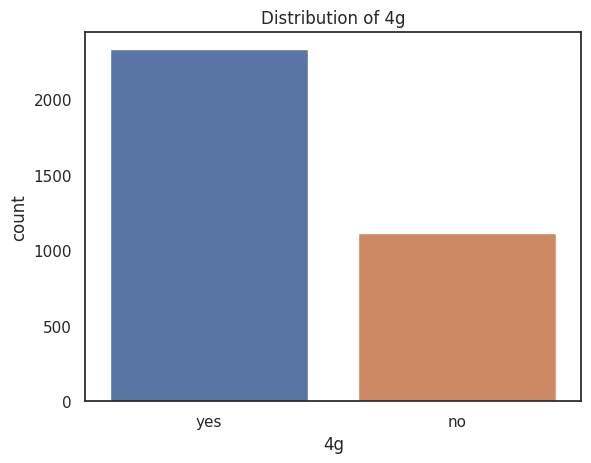

In [29]:
# countplot to view the distribution of 4g
sns.countplot(data = recell_df, x = '4g',hue = '4g')
plt.title('Distribution of 4g')
plt.xlabel('4g')
plt.show()

<font size = "-1">
Observation:

 - We observe from the distribution that most of the users prefer 4g.

#####5G#####

In [30]:
# print the values in 5g column
fiveG_count = recell_df['5g'].value_counts()
fiveG_proportion = (recell_df['5g'].value_counts(normalize = True)*100).sort_values(ascending = False)
fiveG_count_df = pd.DataFrame({'Count': fiveG_count , 'Proportions': fiveG_proportion})
print(fiveG_count_df)

     Count  Proportions
5g                     
no    3302    95.599305
yes    152     4.400695


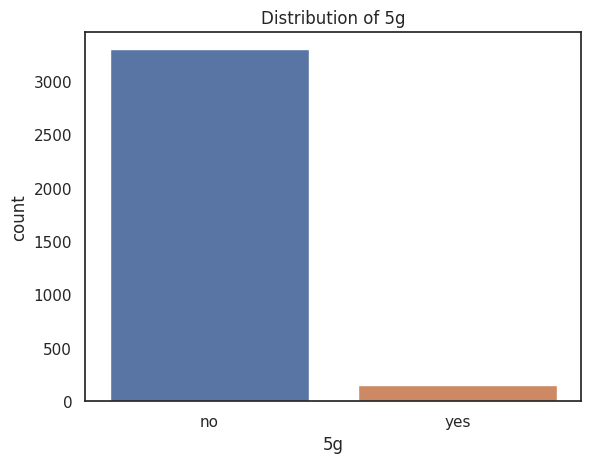

In [31]:
# countplot to view the distribution of 5g
sns.countplot(data = recell_df, x = '5g',hue = '5g')
plt.title('Distribution of 5g')
plt.xlabel('5g')
plt.show()



<font size = "-1">
Observation:

- We observe from the distribution that most of the users donot prefer 5g.

#####main_camera_mp#####

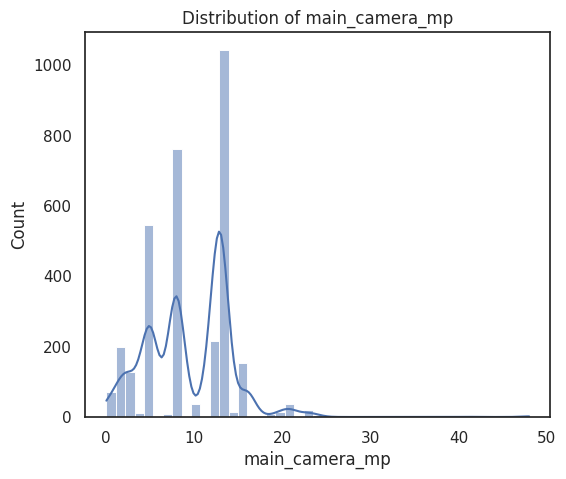

************************************************************************************************************************


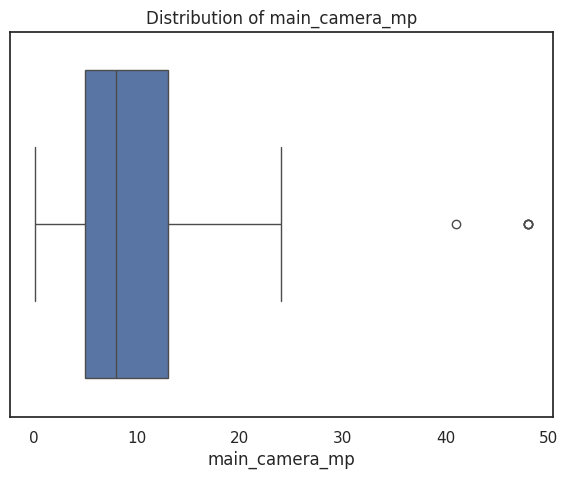

In [32]:
# histplot to view the distribution of main camera
plt.figure(figsize=(6, 5))
sns.histplot(data = recell_df, x = 'main_camera_mp',kde = True)
plt.title('Distribution of main_camera_mp')
plt.xlabel('main_camera_mp')
plt.show()
print('******'*20)
# boxplot to understand the distribution of main camera
plt.figure(figsize=(7, 5))
sns.boxplot(data = recell_df, x = 'main_camera_mp')
plt.title('Distribution of main_camera_mp')
plt.xlabel('main_camera_mp')
plt.show()

<font size = "-1">
Observation:

 - We observe the distribution has highest peak around 12 megapixels, indicating that 12MP is the most common main camera resolution in devices.
 - Also from boxplot we see few outliers around 40MP and 48MP, which likely represents high-end models.

#####selfie_camera_mp#####

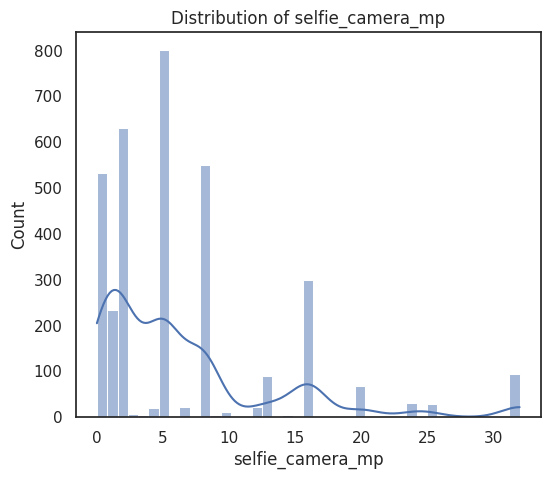

************************************************************************************************************************


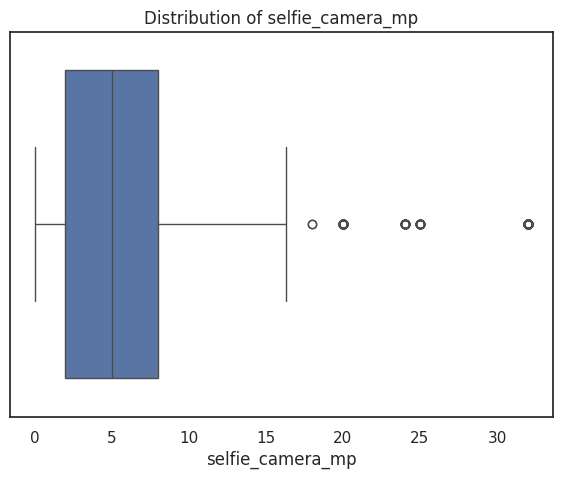

In [33]:
# histplot to view the distribution of selfie camera
plt.figure(figsize=(6, 5))
sns.histplot(data = recell_df, x = 'selfie_camera_mp',kde = True)
plt.title('Distribution of selfie_camera_mp')
plt.xlabel('selfie_camera_mp')
plt.show()
print('******'*20)
# boxplot to understand the distribution of selfie camera
plt.figure(figsize=(7, 5))
sns.boxplot(data = recell_df, x = 'selfie_camera_mp')
plt.title('Distribution of selfie_camera_mp')
plt.xlabel('selfie_camera_mp')
plt.show()


***Observation:***

 - We observe most devices in the dataset have selfie cameras ranging around 0 to 15MP.
 - As boxplot shows few outliers, indicating few devices exceed 20MP which is uncommon.

######int_memory#####

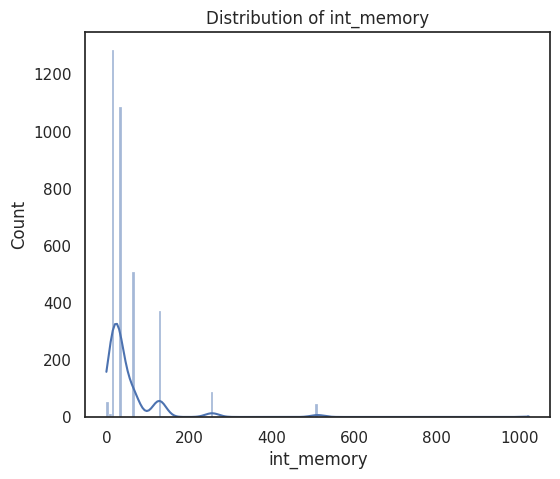

************************************************************************************************************************


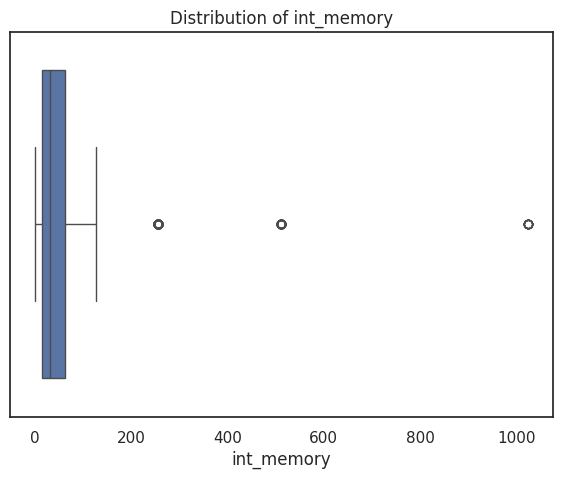

In [34]:
# histplot to view the distribution of int_memory
plt.figure(figsize=(6, 5))
sns.histplot(data = recell_df, x = 'int_memory',kde = True)
plt.title('Distribution of int_memory')
plt.xlabel('int_memory')
plt.show()
print('******'*20)
# boxplot to understand the distribution of int_memory
plt.figure(figsize=(7, 5))
sns.boxplot(data = recell_df, x = 'int_memory')
plt.title('Distribution of int_memory')
plt.xlabel('int_memory')
plt.show()

#####RAM#####

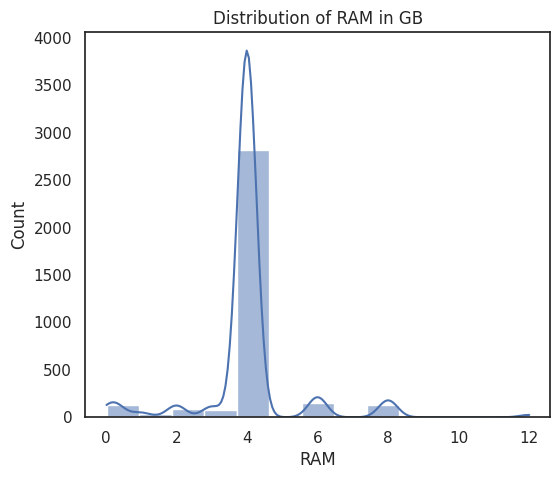

************************************************************************************************************************


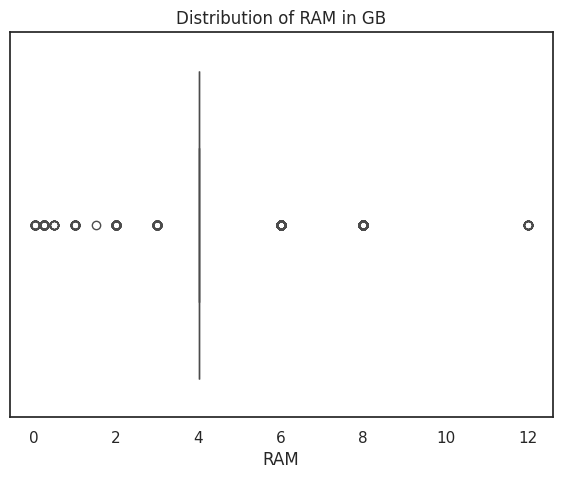

In [35]:
# histplot to view the distribution of RAM
plt.figure(figsize=(6, 5))
sns.histplot(data = recell_df, x = 'ram',kde = True)
plt.title('Distribution of RAM in GB')
plt.xlabel('RAM')
plt.show()
print('******'*20)
# boxplot to understand the distribution of RAM
plt.figure(figsize=(7, 5))
sns.boxplot(data = recell_df, x = 'ram')
plt.title('Distribution of RAM in GB')
plt.xlabel('RAM')
plt.show()

***Observation:***

- We see the distribution shows 4GM RAM is the most common across the devices in the dataset.

#####Battery#####

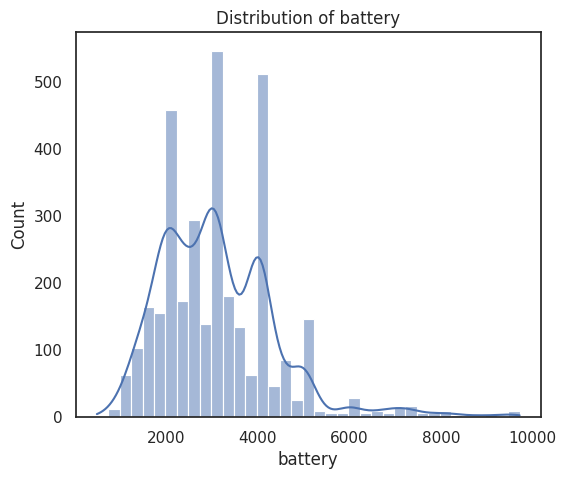

************************************************************************************************************************


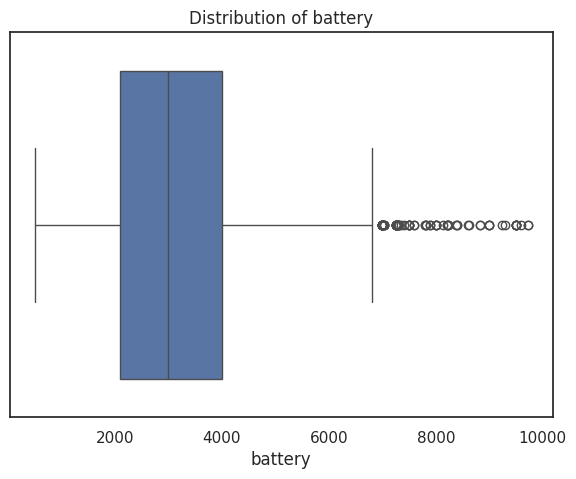

In [36]:
# histplot to view the distribution of battery
plt.figure(figsize=(6, 5))
sns.histplot(data = recell_df, x = 'battery',kde = True)
plt.title('Distribution of battery')
plt.xlabel('battery')
plt.show()
print('******'*20)
# boxplot to understand the distribution of battery
plt.figure(figsize=(7, 5))
sns.boxplot(data = recell_df, x = 'battery')
plt.title('Distribution of battery')
plt.xlabel('battery')
plt.show()

***Observation:***

- Devices with higher battery capacities tend to have higher price, and we see the median battery capacity is approximately 4000 mAh.There are several outliers above 6000 mAh to 10000 mAh.

#####Weight#####

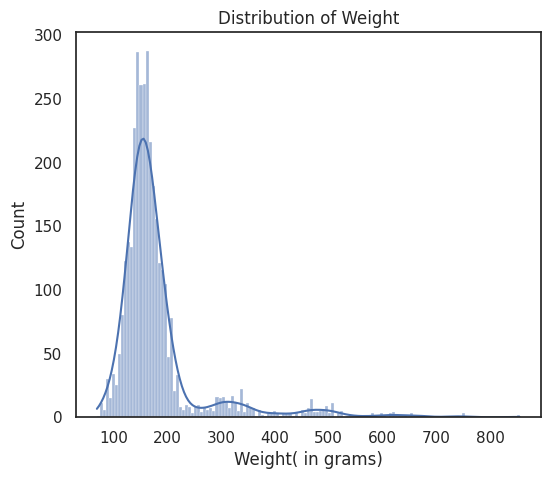

************************************************************************************************************************


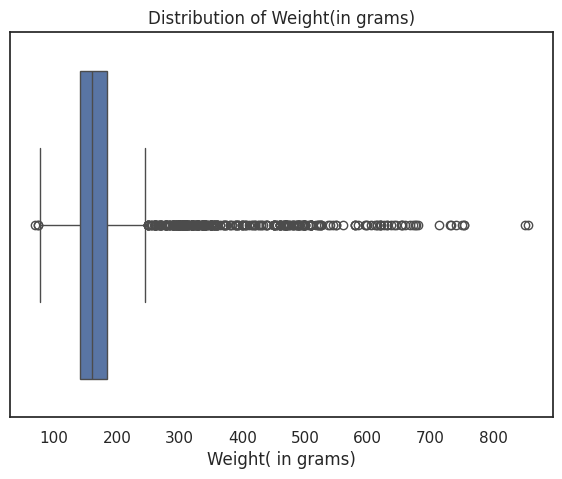

In [37]:
# histplot to view the distribution of weight
plt.figure(figsize=(6, 5))
sns.histplot(data = recell_df, x = 'weight',kde = True)
plt.title('Distribution of Weight')
plt.xlabel('Weight( in grams)')
plt.show()
print('******'*20)
# boxplot to understand the distribution of weight
plt.figure(figsize=(7, 5))
sns.boxplot(data = recell_df, x = 'weight')
plt.title('Distribution of Weight(in grams)')
plt.xlabel('Weight( in grams)')
plt.show()

***Observation:***

 - The median weight is approximately 150 grams, most of the devices weight lies between 100 and 250. There are significant number of outliers extending up to around 800 grams.

#####Release Year#####

In [38]:
# print the count and proportions of release year
release_year_count = recell_df['release_year'].value_counts()
release_year_proportion = (recell_df['release_year'].value_counts(normalize = True)*100).sort_values(ascending = False)
release_year_count_df = pd.DataFrame({'Count': release_year_count , 'Proportions': release_year_proportion})
print(release_year_count_df)

              Count  Proportions
release_year                    
2014            642    18.587145
2013            570    16.502606
2015            515    14.910249
2019            446    12.912565
2016            383    11.088593
2018            322     9.322525
2017            299     8.656630
2020            277     8.019687


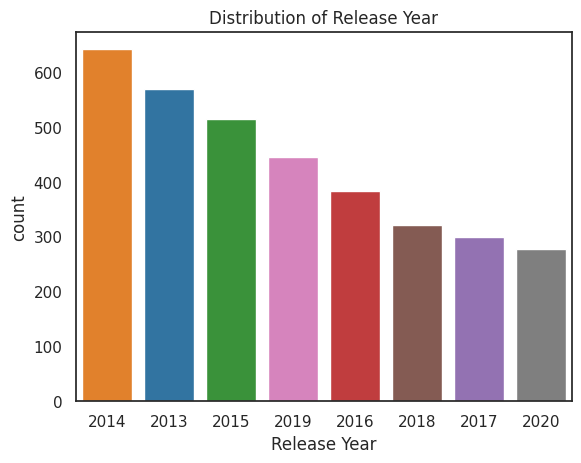

In [39]:
# countplot to view the distribution
sns.countplot(data = recell_df, x = recell_df['release_year'],order = release_year_count.index,hue = 'release_year',palette = 'tab10',legend = False)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')

plt.show()

<font size = "-1">
Observation:

- We observe 18% of devices launched in 2014 and 16% in 2013, it indicates that older models are the most frequently refurbished.

#####days_used#####

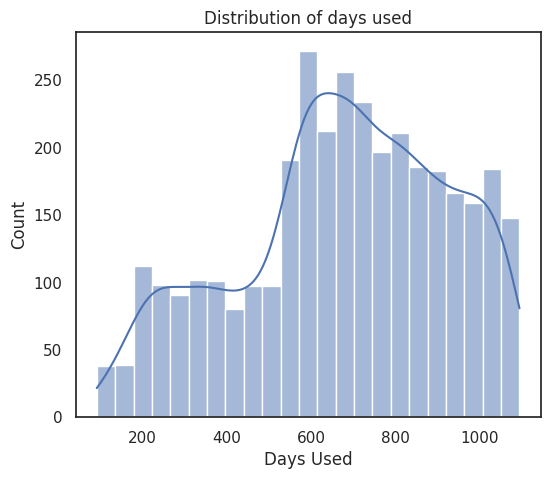

************************************************************************************************************************


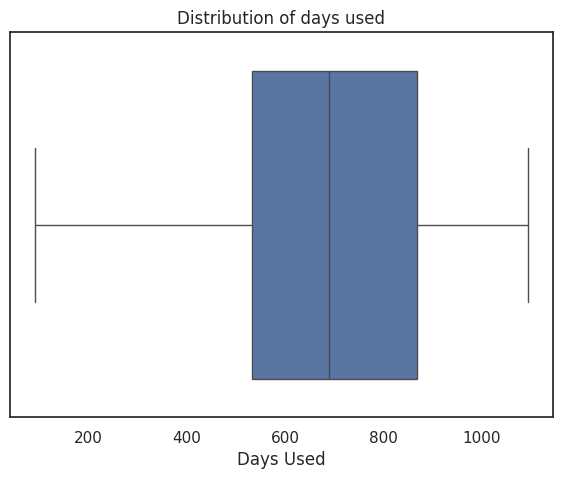

In [40]:
# histplot to view the distribution of days_used
plt.figure(figsize=(6, 5))
sns.histplot(data = recell_df, x = 'days_used',kde = True)
plt.title('Distribution of days used')
plt.xlabel('Days Used')
plt.show()
print('******'*20)
# boxplot to understand the distribution of days_used
plt.figure(figsize=(7, 5))
sns.boxplot(data = recell_df, x = 'days_used')
plt.title('Distribution of days used')
plt.xlabel('Days Used')
plt.show()

#####normalized_new_price#####

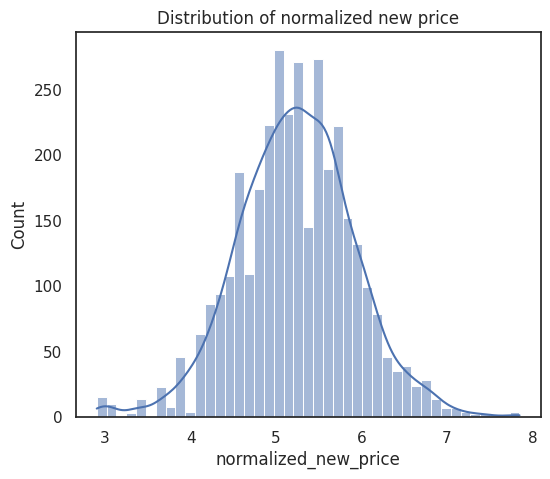

************************************************************************************************************************


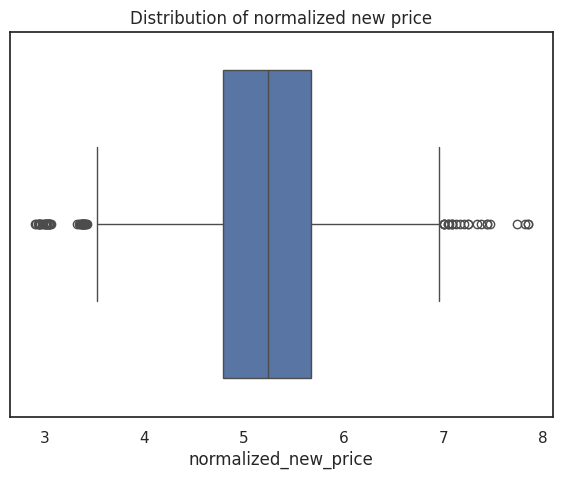

In [41]:
# histplot to view the distribution of normlized new price
plt.figure(figsize=(6, 5))
sns.histplot(data = recell_df, x = 'normalized_new_price',kde = True)
plt.title('Distribution of normalized new price')
plt.xlabel('normalized_new_price')
plt.show()
print('******'*20)
# boxplot to understand the distribution of normlized new price
plt.figure(figsize=(7, 5))
sns.boxplot(data = recell_df, x = 'normalized_new_price')
plt.title('Distribution of normalized new price')
plt.xlabel('normalized_new_price')
plt.show()

***Observation:***

 - The mean and median are relatively close, indicating a general normal but slightly skewed distribution, boxplot shows the presence of outliers, indicating few high end devices significantly impact the price.

#####normalized_used_price#####

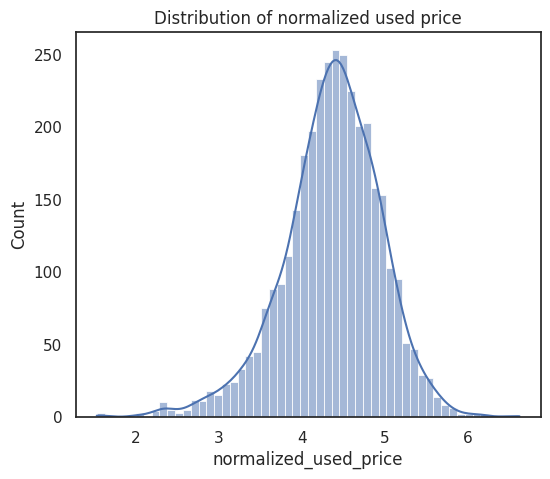

************************************************************************************************************************


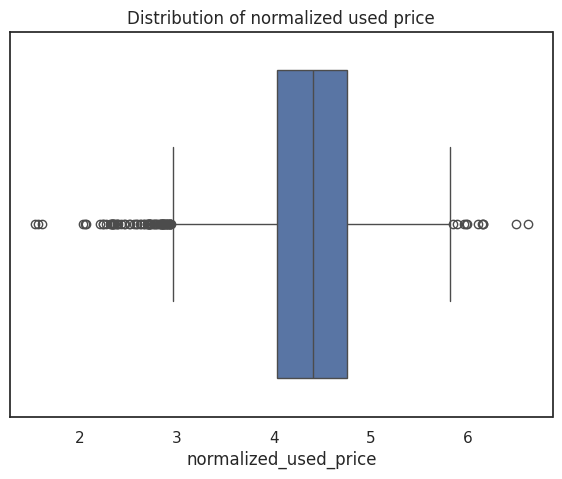

In [42]:
# histplot to view the distribution of normlized used price
plt.figure(figsize=(6, 5))
sns.histplot(data = recell_df, x = 'normalized_used_price',kde = True)
plt.title('Distribution of normalized used price')
plt.xlabel('normalized_used_price')
plt.show()
print('******'*20)
# boxplot to understand the distribution of normlized used price
plt.figure(figsize=(7, 5))
sns.boxplot(data = recell_df, x = 'normalized_used_price')
plt.title('Distribution of normalized used price')
plt.xlabel('normalized_used_price')
plt.show()

<font size = "-1">
Observation:

 - The distribution shows normal, there are some outliers in the boxplot that represents high end devices with higher resale value.

###Bivariate Analysis###

#####Correlation between the variables#####

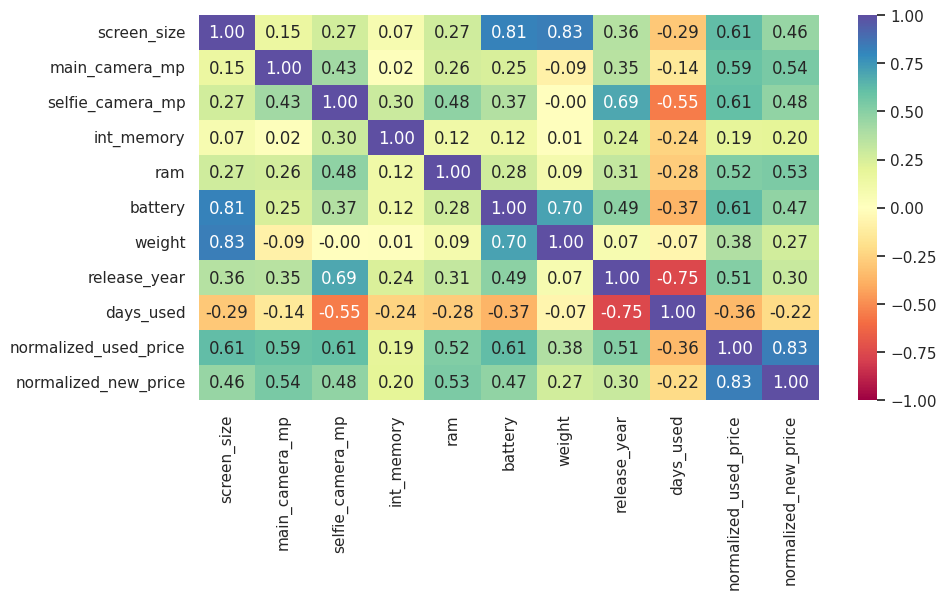

In [43]:
# Heatmap to view the correlation between variables
plt.figure(figsize=(10, 5))
sns.heatmap(recell_df_numerical.corr(), annot = True, cmap = 'Spectral', fmt = '.2f',vmax = 1, vmin = -1)
plt.show()

#####Brand name vs OS#####

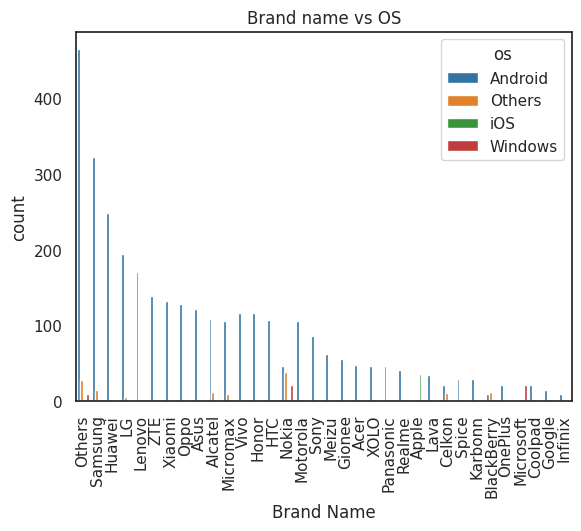

In [44]:
# countplot to view the distribution between brand name and os
sns.countplot(data = recell_df, x = 'brand_name', hue = 'os',order = recell_df['brand_name'].value_counts().index,palette = 'tab10')
plt.title('Brand name vs OS')
plt.xlabel('Brand Name')
plt.xticks(rotation=90)
plt.show()

#####Brand vs Screen size#####

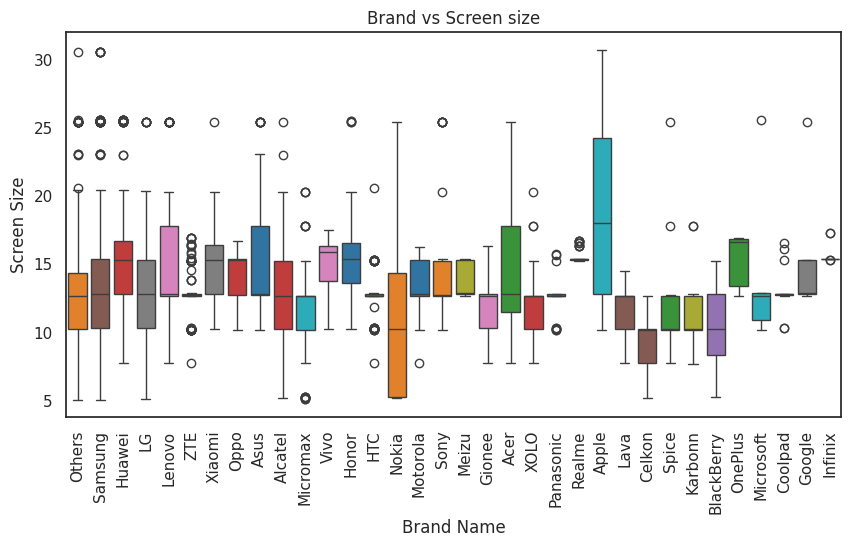

In [45]:
# boxplot to view the distribution between brand name and Screen Size
plt.figure(figsize=(10, 5))
sns.boxplot(data = recell_df, x = 'brand_name', y = 'screen_size',order = recell_df['brand_name'].value_counts().index, hue = 'brand_name', palette= 'tab10')
plt.title('Brand vs Screen size')
plt.xlabel('Brand Name')
plt.ylabel('Screen Size')
plt.xticks(rotation=90)
plt.show()

#####Brand vs 4G#####

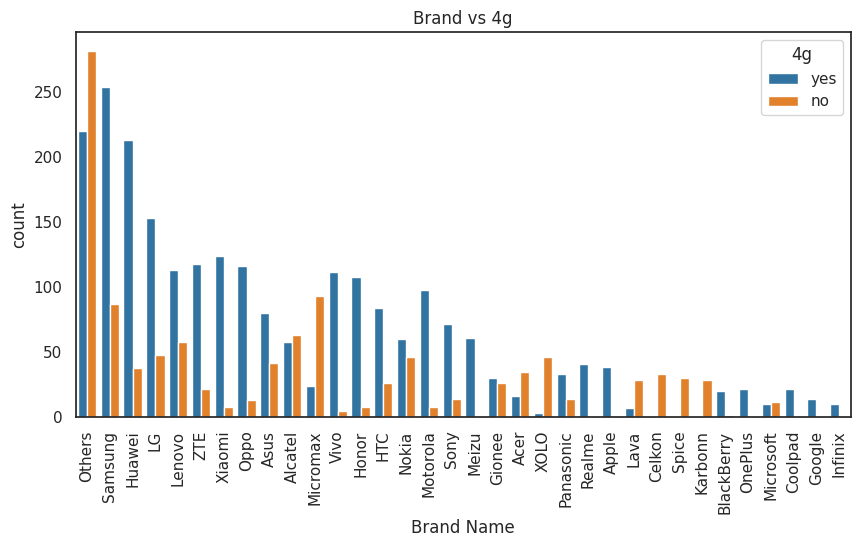

In [46]:
# countplot to view the distribution between brand name and 4G
plt.figure(figsize=(10, 5))
sns.countplot(data = recell_df, x = 'brand_name',order = recell_df['brand_name'].value_counts().index, hue = '4g', palette= 'tab10')
plt.title('Brand vs 4g')
plt.xlabel('Brand Name')
plt.xticks(rotation=90)
plt.show()

#####Brand vs 5G#####

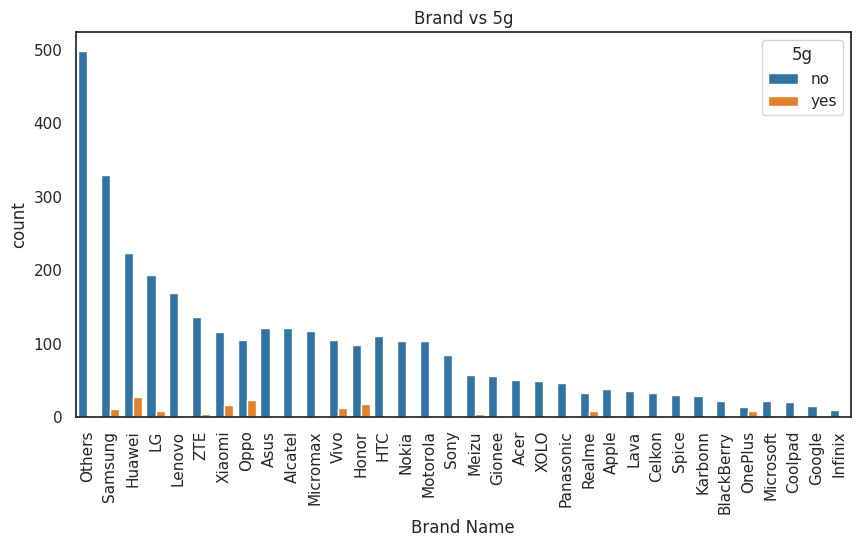

In [47]:
# countplot to view the distribution between brand name and 5G
plt.figure(figsize=(10, 5))
sns.countplot(data = recell_df, x = 'brand_name',order = recell_df['brand_name'].value_counts().index, hue = '5g', palette= 'tab10')
plt.title('Brand vs 5g')
plt.xlabel('Brand Name')
plt.xticks(rotation=90)
plt.show()

#####Brand vs RAM#####

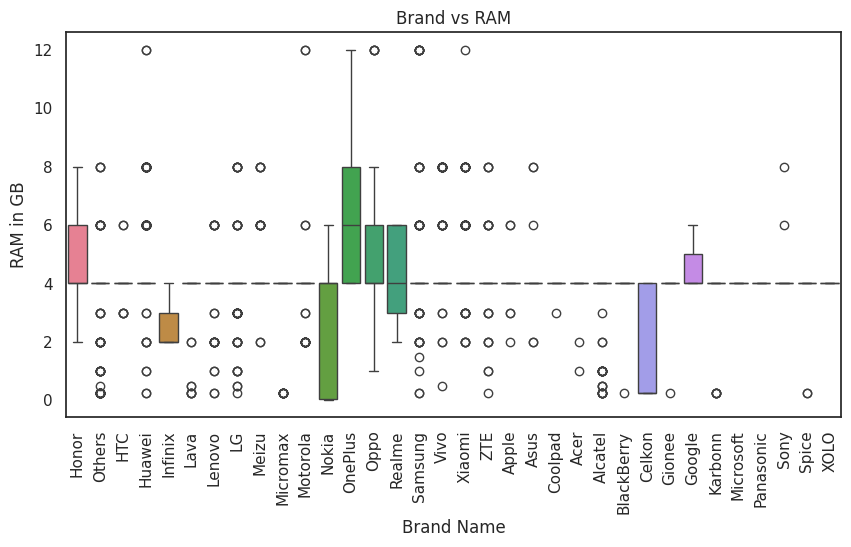

In [48]:
# boxplot to view the distribution between brand name and RAM
plt.figure(figsize=(10, 5))
sns.boxplot(data = recell_df, x = 'brand_name', y = 'ram',hue = 'brand_name')
plt.title('Brand vs RAM')
plt.xlabel('Brand Name')
plt.ylabel('RAM in GB')
plt.xticks(rotation=90)
plt.show()

#####Brand vs Battery#####

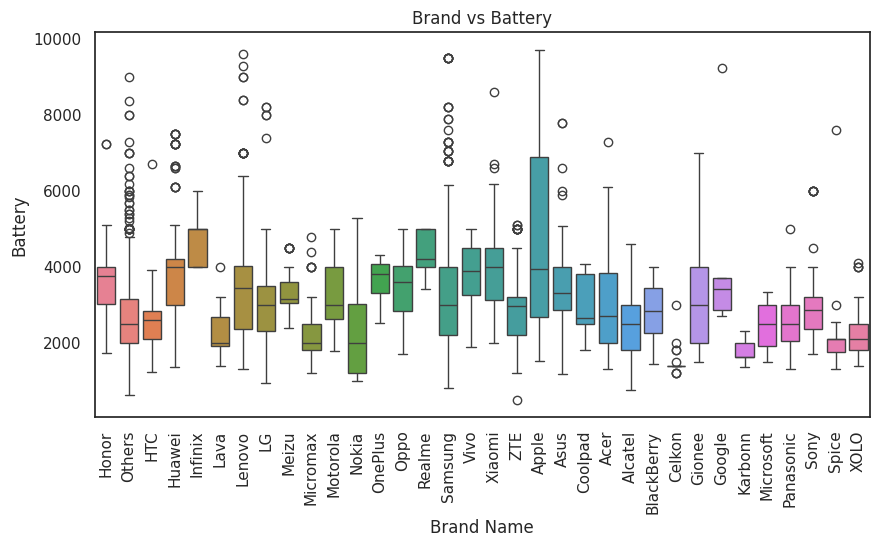

In [49]:
# boxplot to view the distribution between brand name and battery
plt.figure(figsize=(10, 5))
sns.boxplot(data = recell_df, x = 'brand_name', y = 'battery',hue = 'brand_name')
plt.title('Brand vs Battery')
plt.xlabel('Brand Name')
plt.ylabel('Battery')
plt.xticks(rotation=90)
plt.show()

#####Brand vs main camera mp#####

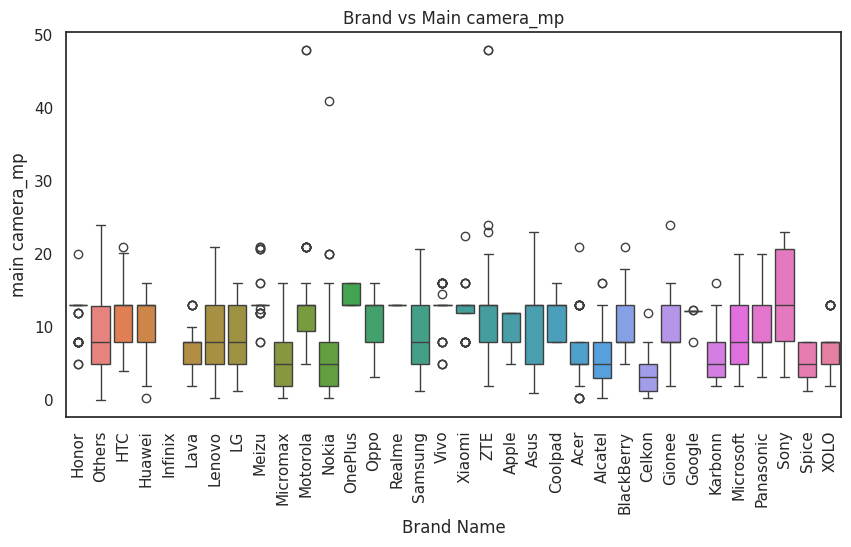

In [50]:
# boxplot to view the distribution between brand name and main camera
plt.figure(figsize=(10, 5))
sns.boxplot(data = recell_df, x = 'brand_name', y = 'main_camera_mp',hue = 'brand_name')
plt.title('Brand vs Main camera_mp')
plt.xlabel('Brand Name')
plt.ylabel('main camera_mp')
plt.xticks(rotation=90)
plt.show()

#####Brand vs Selfie camera mp#####

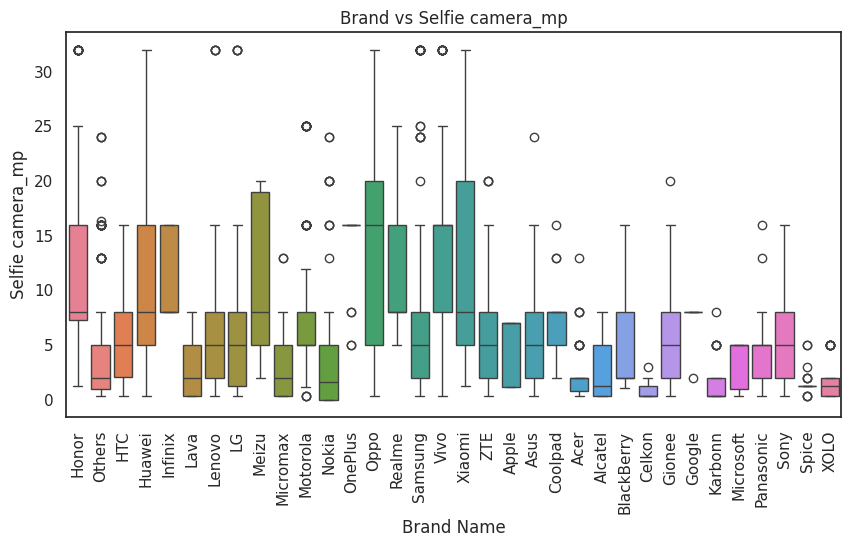

In [51]:
# boxplot to view the distribution between brand name and selfie camera
plt.figure(figsize=(10, 5))
sns.boxplot(data = recell_df, x = 'brand_name', y = 'selfie_camera_mp',hue = 'brand_name')
plt.title('Brand vs Selfie camera_mp')
plt.xlabel('Brand Name')
plt.ylabel('Selfie camera_mp')
plt.xticks(rotation=90)
plt.show()

#####Brand vs int memory

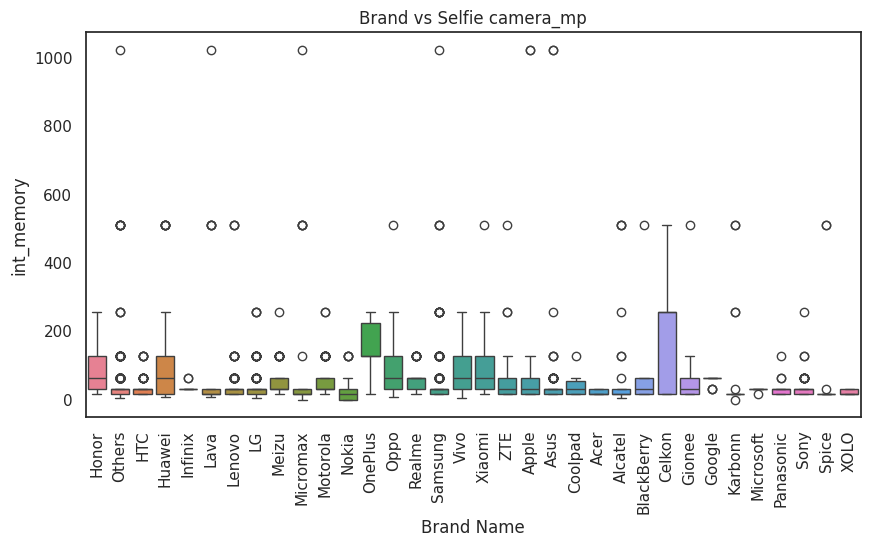

In [52]:
# boxplot to view the distribution between brand name and int_memory
plt.figure(figsize=(10, 5))
sns.boxplot(data = recell_df, x = 'brand_name', y = 'int_memory',hue = 'brand_name')
plt.title('Brand vs Selfie camera_mp')
plt.xlabel('Brand Name')
plt.ylabel('int_memory')
plt.xticks(rotation=90)
plt.show()

#####Brand vs Weight#####

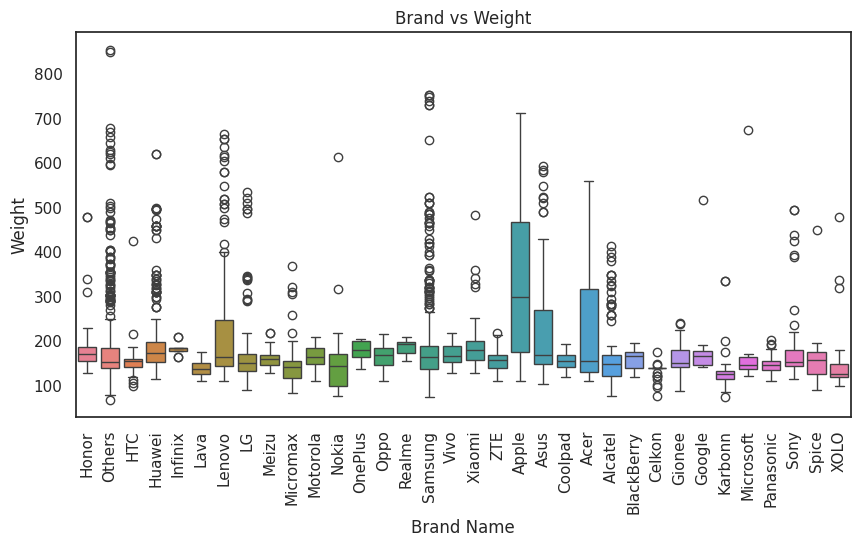

In [53]:
# boxplot to view the distribution between brand name and weight
plt.figure(figsize=(10, 5))
sns.boxplot(data = recell_df, x = 'brand_name', y = 'weight',hue = 'brand_name')
plt.title('Brand vs Weight')
plt.xlabel('Brand Name')
plt.ylabel('Weight')
plt.xticks(rotation=90)
plt.show()

#####Brand vs Days Used#####

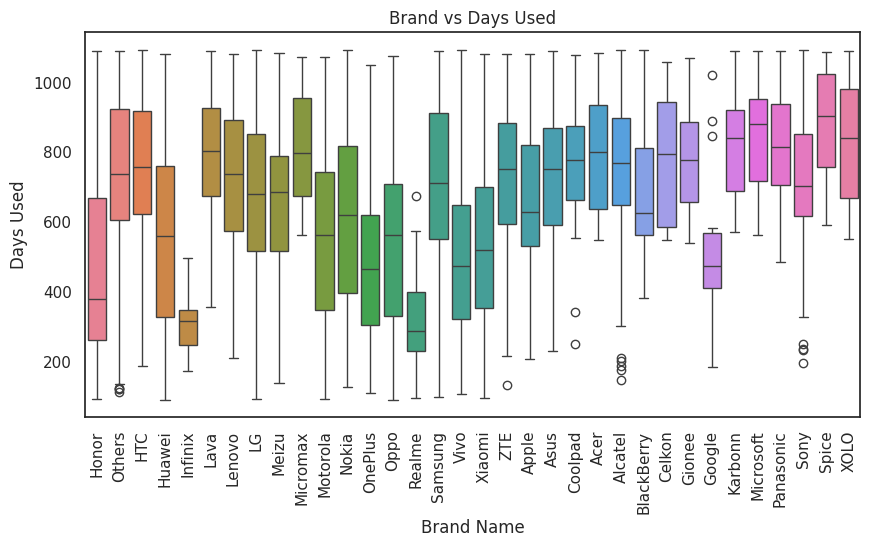

In [54]:
# boxplot to view the distribution between brand name and days used
plt.figure(figsize=(10, 5))
sns.boxplot(data = recell_df, x = 'brand_name', y = 'days_used',hue = 'brand_name')
plt.title('Brand vs Days Used')
plt.xlabel('Brand Name')
plt.ylabel('Days Used')
plt.xticks(rotation=90)
plt.show()


#####Brand vs Normalized new price#####

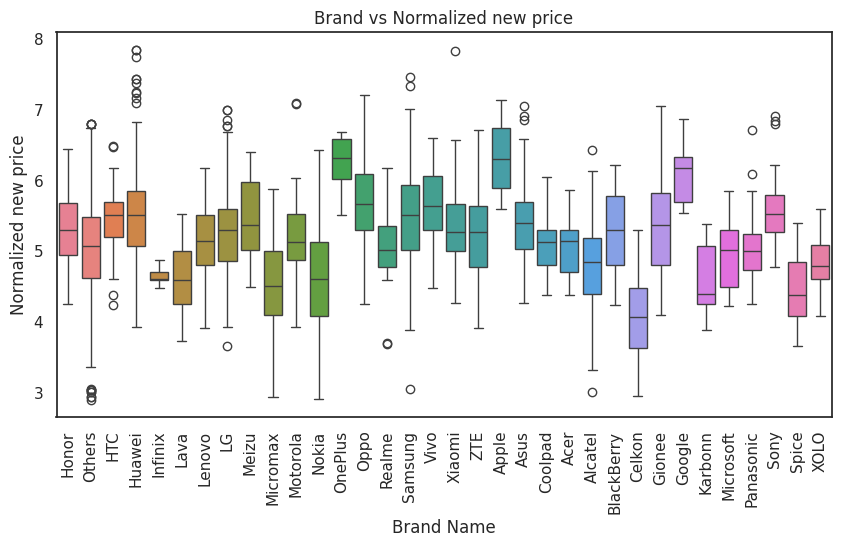

************************************************************************************************************************


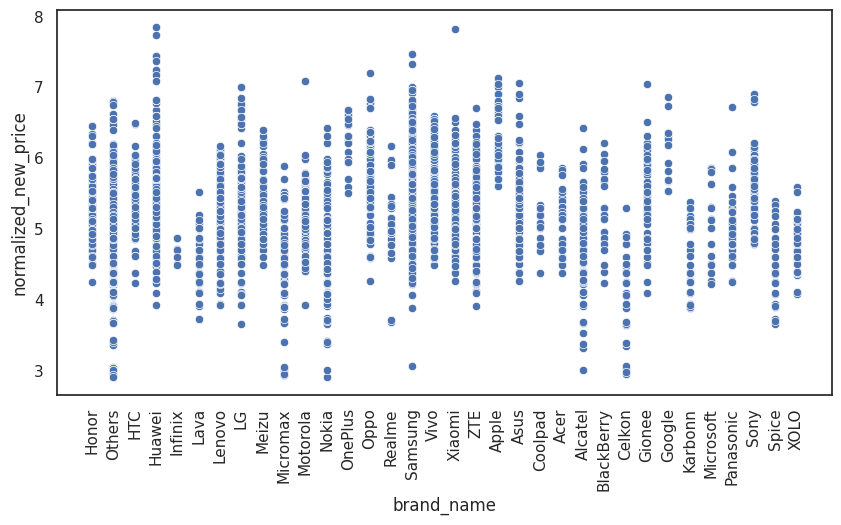

************************************************************************************************************************


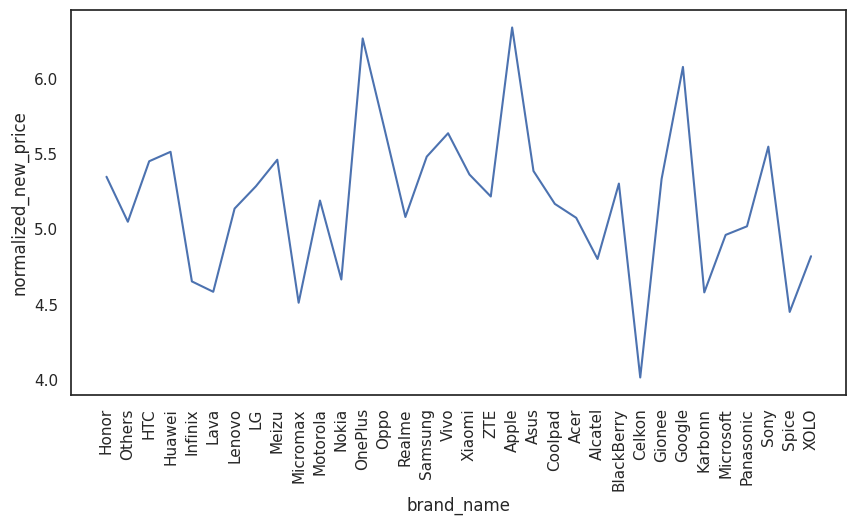

In [55]:
# boxplot to view the distribution between brand name and normalized new price
plt.figure(figsize=(10, 5))
sns.boxplot(data = recell_df, x = 'brand_name', y = 'normalized_new_price',hue = 'brand_name')
plt.title('Brand vs Normalized new price')
plt.xlabel('Brand Name')
plt.ylabel('Normalized new price')
plt.xticks(rotation=90)
plt.show()
print('******'*20)
#scatterplot to view distribution between brand name and normalized new price
plt.figure(figsize=(10, 5))
sns.scatterplot(data = recell_df, x = 'brand_name', y = 'normalized_new_price')
plt.xticks(rotation=90)
plt.show()
print('******'*20)
#lineplot to view distribution between brand name and normalized new price
plt.figure(figsize=(10, 5))
sns.lineplot(data = recell_df, x = 'brand_name', y = 'normalized_new_price', errorbar = None)
plt.xticks(rotation=90)
plt.show()

#####Brand vs Normalized used price#####

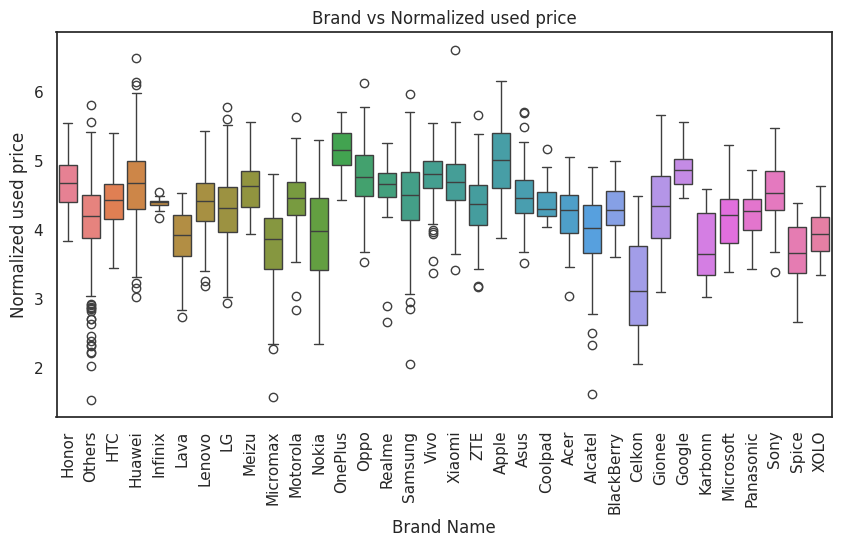

************************************************************************************************************************


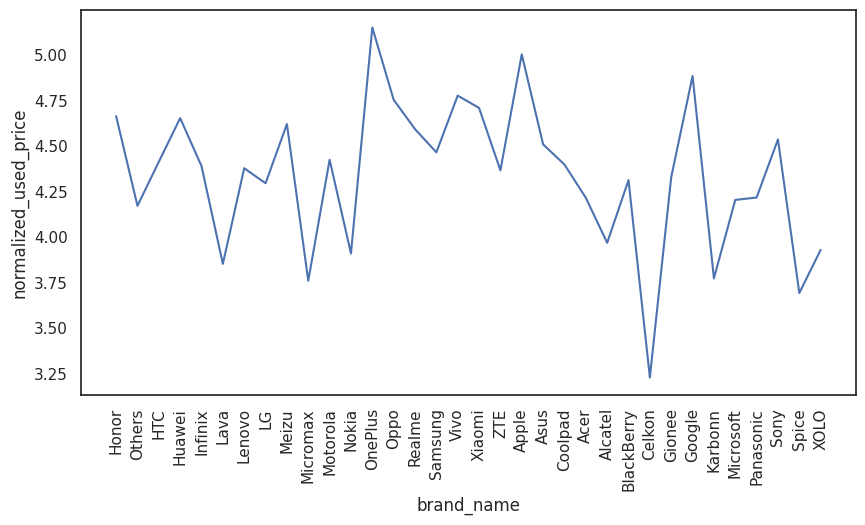

In [56]:
# boxplot to view the distribution between brand name and normalized used price
plt.figure(figsize=(10, 5))
sns.boxplot(data = recell_df, x = 'brand_name', y = 'normalized_used_price',hue = 'brand_name')
plt.title('Brand vs Normalized used price')
plt.xlabel('Brand Name')
plt.ylabel('Normalized used price')
plt.xticks(rotation=90)
plt.show()
print('******'*20)
#lineplot to view the distribution between brand name and normalized used price
plt.figure(figsize=(10, 5))
sns.lineplot(data = recell_df, x = 'brand_name', y = 'normalized_used_price', errorbar = None)
plt.xticks(rotation=90)
plt.show()


<font size = "-1">
Observation:

- We observe Celkon has very low used price , followed by Micromax and Nokia also there are outliers in brand (Others) has low prices.

#####Release year vs Normalized used price#####

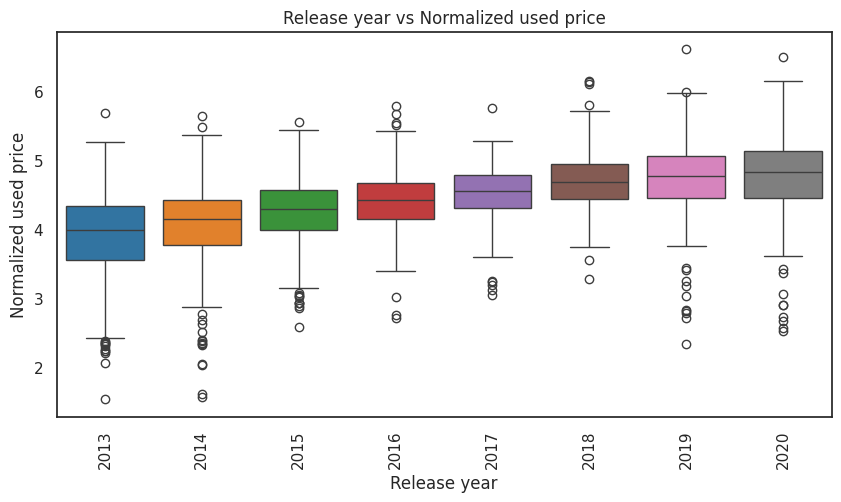

************************************************************************************************************************


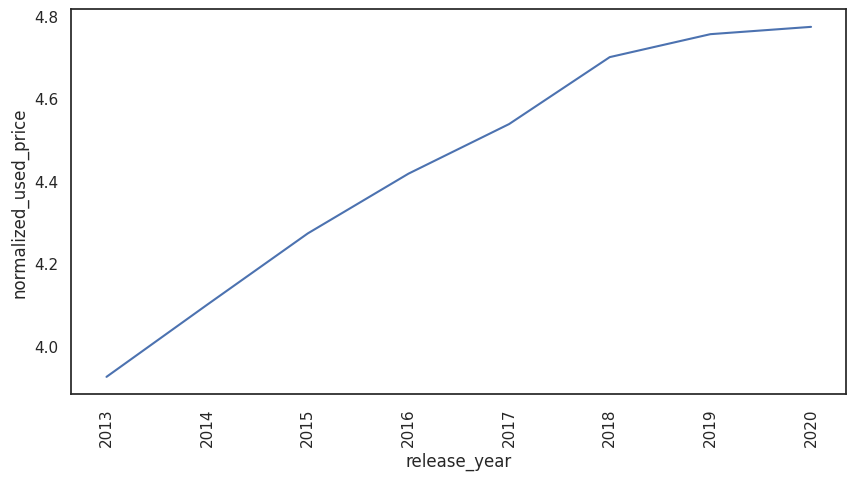

In [57]:
#boxplot to view the distribution between release year and normalized used price
plt.figure(figsize=(10, 5))
sns.boxplot(data = recell_df, x = 'release_year',y= 'normalized_used_price',hue = 'release_year',palette= 'tab10',legend = False)
plt.title('Release year vs Normalized used price')
plt.xlabel('Release year')
plt.ylabel('Normalized used price')
plt.xticks(rotation=90)
plt.show()
print('******'*20)
#lineplot to view the distribution between release year and normalized used price
plt.figure(figsize=(10, 5))
sns.lineplot(data = recell_df, x = 'release_year', y = 'normalized_used_price', errorbar = None)
plt.xticks(rotation=90)
plt.show()


***Observation:***

- We observe New released devices tend to have higher used price.

#####OS vs Normalized used price#####

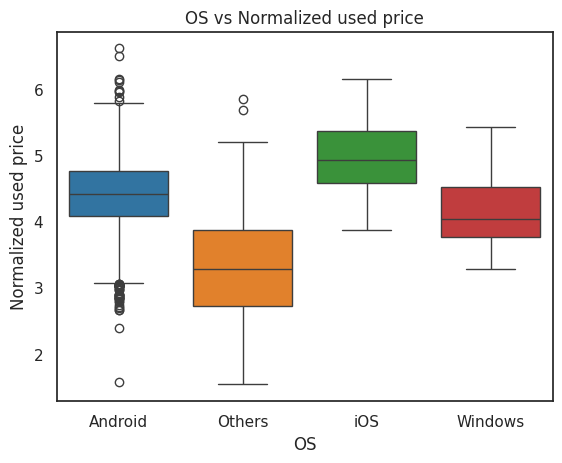

In [58]:
# boxplot to view the distribution between os and normalized used price
sns.boxplot(data = recell_df, x = 'os', y = 'normalized_used_price',hue = 'os',palette= 'tab10',legend = False)
plt.title('OS vs Normalized used price')
plt.xlabel('OS')
plt.ylabel('Normalized used price')
plt.show()

Text(0.5, 19.049999999999997, 'OS')

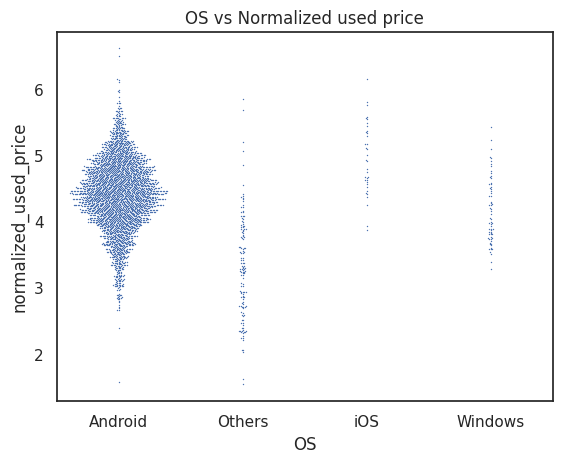

In [59]:
#swarmplot to view distribution between os and normalized used price
sns.swarmplot(data = recell_df, x = 'os', y = 'normalized_used_price',size = 1)
plt.title('OS vs Normalized used price')
plt.xlabel('OS')

#####4G vs Normalized used price#####

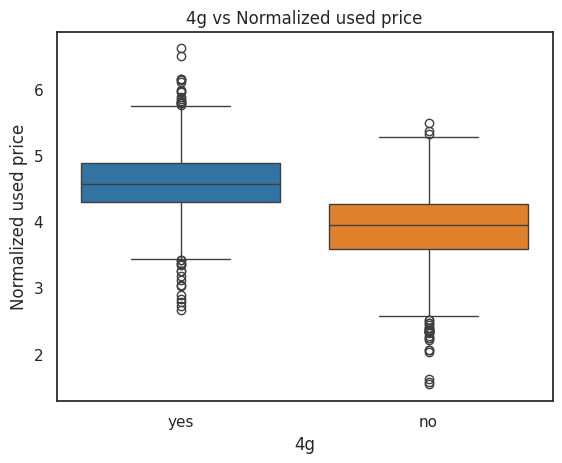

In [60]:
# boxplot to view the distribution between 4g and normalized used price
sns.boxplot(data = recell_df, x = '4g', y = 'normalized_used_price',hue = '4g',palette= 'tab10')
plt.title('4g vs Normalized used price')
plt.xlabel('4g')
plt.ylabel('Normalized used price')
plt.show()

#####5G vs Normalized used price#####

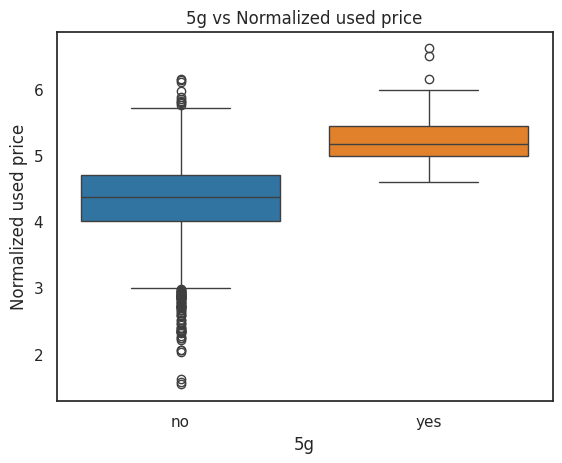

In [61]:
# boxplot to view the distribution between 5G and normalized used price
sns.boxplot(data = recell_df, x = '5g', y = 'normalized_used_price',hue = '5g',palette= 'tab10')
plt.title('5g vs Normalized used price')
plt.xlabel('5g')
plt.ylabel('Normalized used price')
plt.show()

#####Different Network types(4G/5G/Other) vs Normalized used price#####

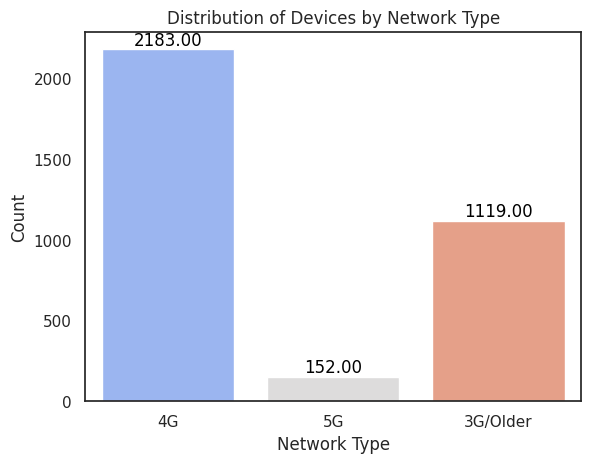

************************************************************************************************************************


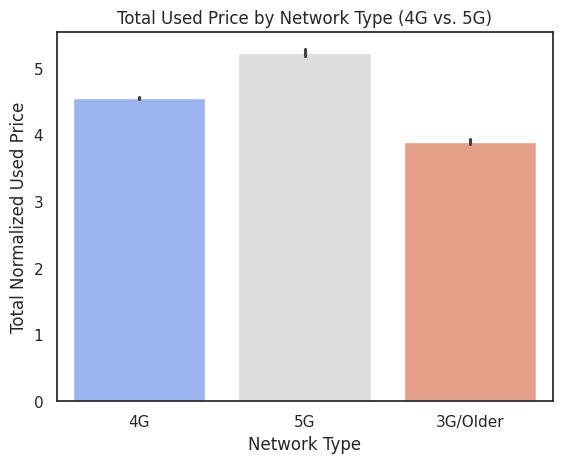

In [62]:
#creating new column to view the number of devices for 4g,5g,other
recell_df['network_type'] = recell_df.apply(lambda row: '5G' if row['5g'] == 'yes'
                                            else ('4G' if row['4g'] == 'yes' else '3G/Older'), axis=1)

# Now plot using the new 'network_type' category
ax =sns.countplot(data=recell_df, x='network_type', hue='network_type', palette='coolwarm')
# Add percentage labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
plt.title('Distribution of Devices by Network Type')
plt.xlabel('Network Type')
plt.ylabel('Count')
plt.show()
print('******'*20)
# barplot to view Total Used Price by Network Type (4G vs. 5G)
sns.barplot(data=recell_df, x='network_type', y='normalized_used_price', estimator= np.mean, hue= 'network_type', palette='coolwarm')
plt.title('Total Used Price by Network Type (4G vs. 5G)')
plt.xlabel('Network Type')
plt.ylabel('Total Normalized Used Price')
plt.show()
# drop the network_type column
recell_df.drop(columns = ['network_type'], axis = 1, inplace = True)

***Observation:***

 - Out of 3454 devices, 2183 devices support 4G, 152 devices (~4%) support 5G and 1119 devices still operate on 3G or older network types.
 - We see the 5G enabled devices have higher resale value.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Imputation



In [63]:
# To find the missing values in the data
print(recell_df.isnull().sum())

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64


In [64]:
# Create a copy of dataset
recell_df_new = recell_df.copy()

In [65]:
# impute the missing values in the data by the column medians grouped by release year and brand name
cols = ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']

for col in cols:
    recell_df_new[col] = recell_df_new[col].fillna(value = recell_df_new.groupby(['release_year','brand_name'])[col].transform('median'))
# check for missing values
recell_df_new.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [66]:
# fill the remaining missing values groupby brand name
cols = ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']
for col in cols:
    recell_df_new[col] = recell_df_new[col].fillna(value = recell_df_new.groupby(['brand_name'])[col].transform('median'))

# check for the missing values
print(recell_df_new.isnull().sum())

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64


In [67]:
# fill the remining missing values with the main_camera_mp median

recell_df_new['main_camera_mp'] = recell_df_new['main_camera_mp'].fillna(value = recell_df_new['main_camera_mp'].median())

# check for the missing values
print(recell_df_new.isnull().sum())

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64


### Feature Engineering

In [68]:
# create a new column 'age_in_years'
# Assuming the data was collected in 2021
recell_df_new['age_in_years'] = 2021 - recell_df_new['release_year']
# dropping the column release_year
recell_df_new.drop(columns = ['release_year'], axis = 1,inplace = True)


In [69]:
# set pandas option to display with 2 decimals
pd.options.display.float_format = '{:.4f}'.format
# print the summary of new dataset
print(recell_df_new.describe().T)



                          count      mean       std      min       25%  \
screen_size           3454.0000   13.7131    3.8053   5.0800   12.7000   
main_camera_mp        3454.0000    9.6176    4.7494   0.0800    5.0000   
selfie_camera_mp      3454.0000    6.5551    6.9684   0.0000    2.0000   
int_memory            3454.0000   54.5285   84.9350   0.0100   16.0000   
ram                   3454.0000    4.0326    1.3686   0.0200    4.0000   
battery               3454.0000 3132.5774 1298.8842 500.0000 2100.0000   
weight                3454.0000  182.6369   88.3604  69.0000  142.0000   
days_used             3454.0000  674.8697  248.5802  91.0000  533.5000   
normalized_used_price 3454.0000    4.3647    0.5889   1.5369    4.0339   
normalized_new_price  3454.0000    5.2331    0.6836   2.9014    4.7903   
age_in_years          3454.0000    5.0347    2.2985   1.0000    3.0000   

                            50%       75%       max  
screen_size             12.8300   15.3400   30.7100  
mai

### Outlier check

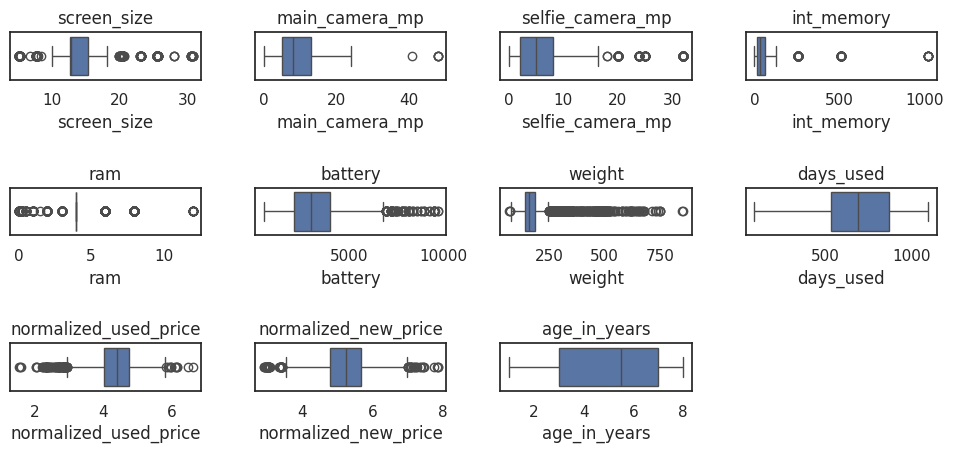

In [70]:
# boxplot to view Outliers
numerical_cols_new = recell_df_new.select_dtypes(include =np.number).columns.to_list()
plt.figure(figsize=(10, 5))

for i,col in enumerate(numerical_cols_new):

    plt.subplot(3,4,i+1)
    sns.boxplot(data = recell_df_new, x = col)
    plt.title(col)
    plt.tight_layout(pad=2)

plt.show()

*Observation :*

Although the variable exhibit outliers, we will retain them as they provide valuable insights by highlighting differences among the devices.

#####Preparing data for modeling#####

In [71]:
# create dummy variables
recell_df_new = pd.get_dummies(data = recell_df_new, columns = ['brand_name', '4g','5g','os'], drop_first = True)

print(recell_df_new.head())

   screen_size  main_camera_mp  selfie_camera_mp  int_memory    ram   battery  \
0      14.5000         13.0000            5.0000     64.0000 3.0000 3020.0000   
1      17.3000         13.0000           16.0000    128.0000 8.0000 4300.0000   
2      16.6900         13.0000            8.0000    128.0000 8.0000 4200.0000   
3      25.5000         13.0000            8.0000     64.0000 6.0000 7250.0000   
4      15.3200         13.0000            8.0000     64.0000 3.0000 5000.0000   

    weight  days_used  normalized_used_price  normalized_new_price  ...  \
0 146.0000        127                 4.3076                4.7151  ...   
1 213.0000        325                 5.1621                5.5190  ...   
2 213.0000        162                 5.1111                5.8846  ...   
3 480.0000        345                 5.1354                5.6310  ...   
4 185.0000        293                 4.3900                4.9478  ...   

   brand_name_Spice  brand_name_Vivo  brand_name_XOLO  brand_n

In [72]:
#print the datatypes of the dataset
print(recell_df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   screen_size            3454 non-null   float64
 1   main_camera_mp         3454 non-null   float64
 2   selfie_camera_mp       3454 non-null   float64
 3   int_memory             3454 non-null   float64
 4   ram                    3454 non-null   float64
 5   battery                3454 non-null   float64
 6   weight                 3454 non-null   float64
 7   days_used              3454 non-null   int64  
 8   normalized_used_price  3454 non-null   float64
 9   normalized_new_price   3454 non-null   float64
 10  age_in_years           3454 non-null   int64  
 11  brand_name_Alcatel     3454 non-null   bool   
 12  brand_name_Apple       3454 non-null   bool   
 13  brand_name_Asus        3454 non-null   bool   
 14  brand_name_BlackBerry  3454 non-null   bool   
 15  bran

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [73]:
# function to create labeled barplots for categorical and numerical variables

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    #plt.xticks(rotation= 180, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,hue = feature,
        palette='Paired',legend = False,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = '{:.1f}%'.format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha='center',
            va='center',
            size=12,
            xytext=(0, 5),
            textcoords='offset points',
        )



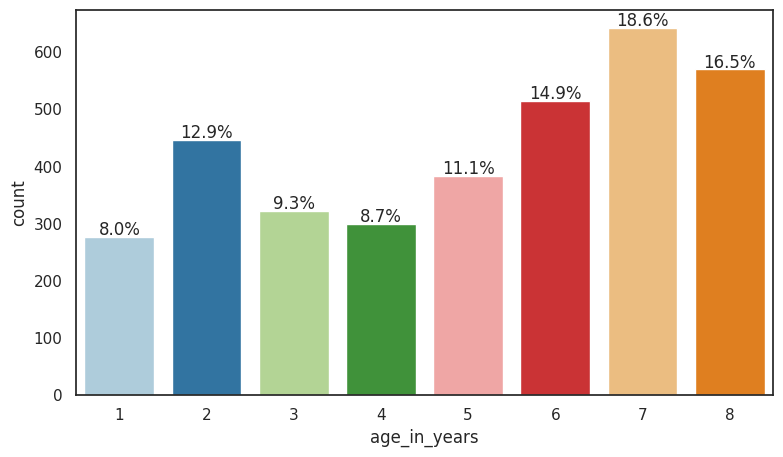

In [74]:
# barplot of age in years with percentage showing on each bar
labeled_barplot(recell_df_new, "age_in_years", perc=True)

<Figure size 4000x1000 with 0 Axes>

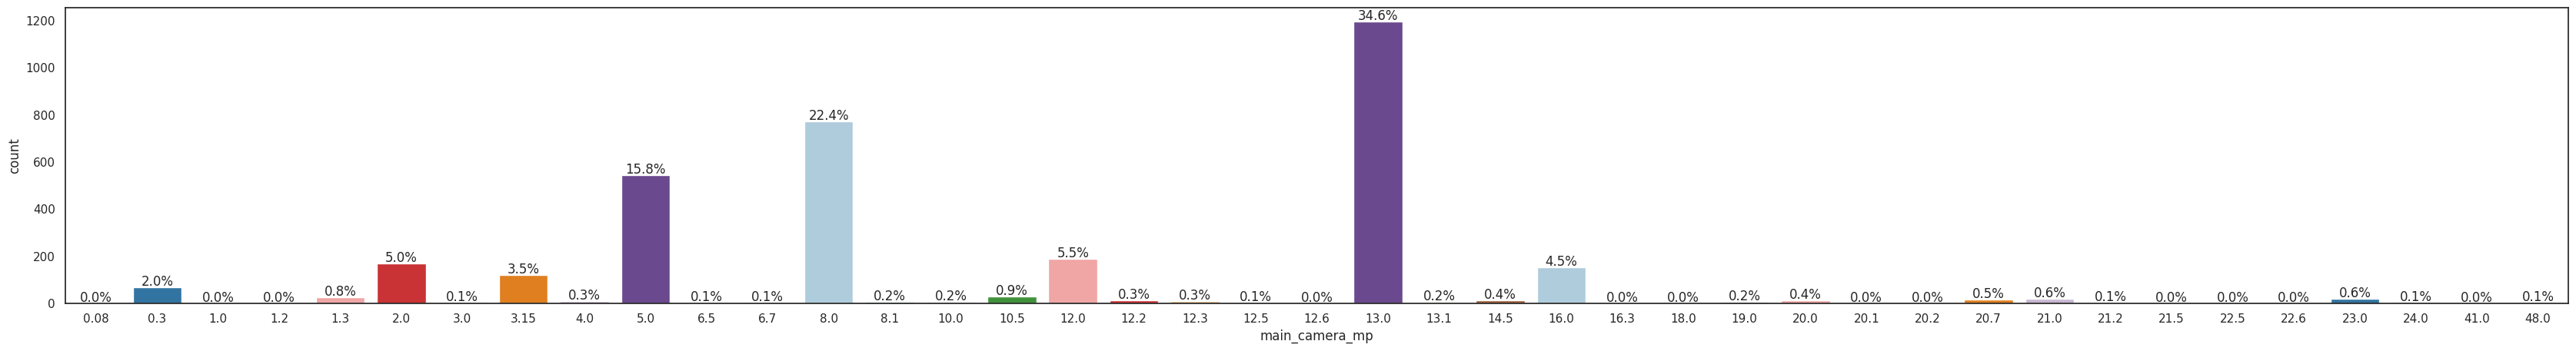

In [75]:
# barplot of main camera with percentage showing on each bar
plt.figure(figsize=(40, 10))
labeled_barplot(recell_df_new, "main_camera_mp", perc=True)

<Figure size 4000x1000 with 0 Axes>

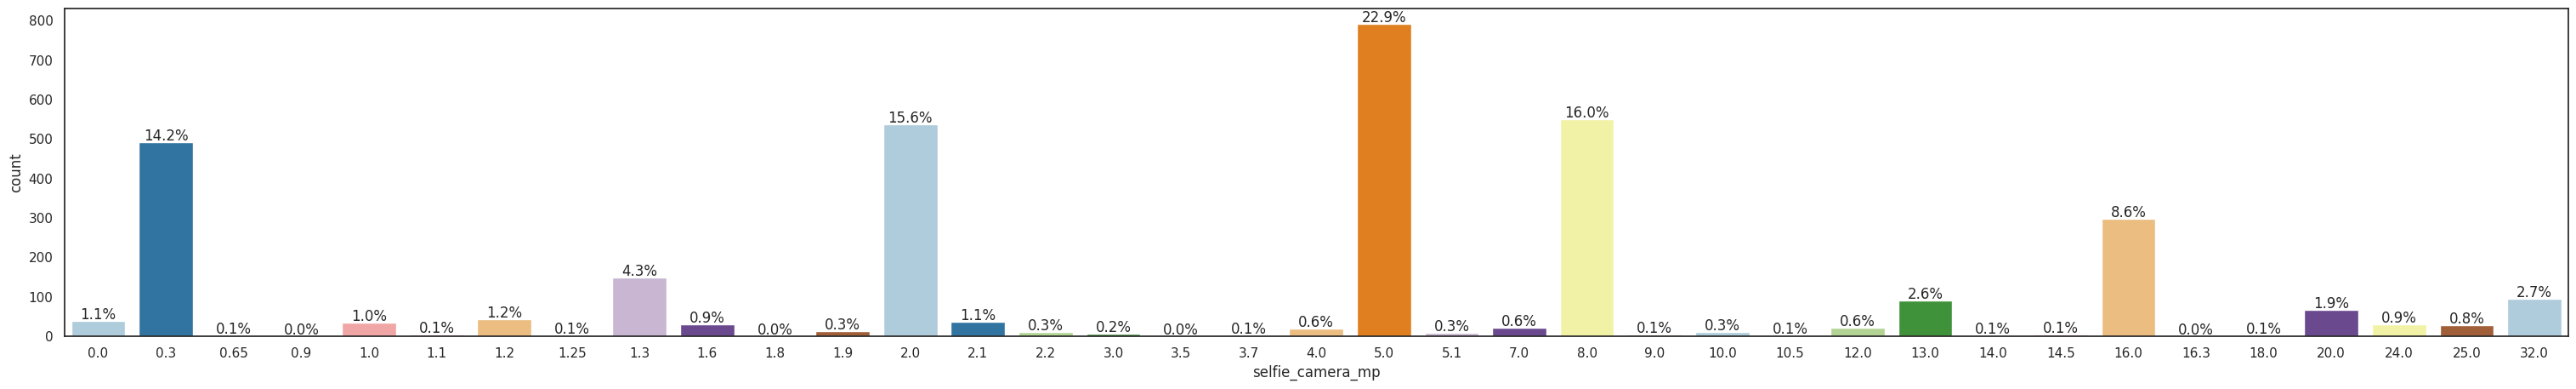

In [76]:
# barplot of selfie camera with percentage showing on each bar
plt.figure(figsize=(40, 10))
labeled_barplot(recell_df_new, "selfie_camera_mp", perc=True)

Text(0.5, 1.0, 'Weight')

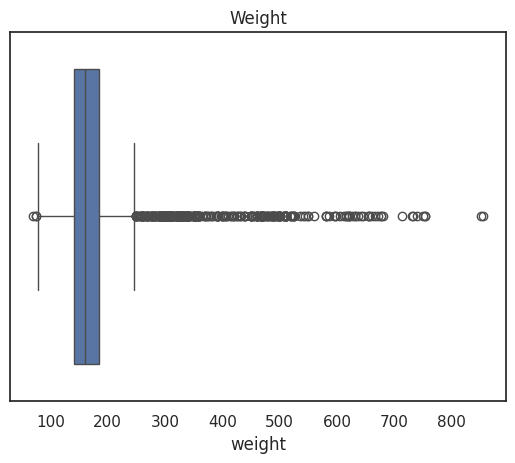

In [77]:
# barplot of weight with percentage showing on each bar
sns.boxplot(recell_df_new, x='weight')
plt.title('Weight')


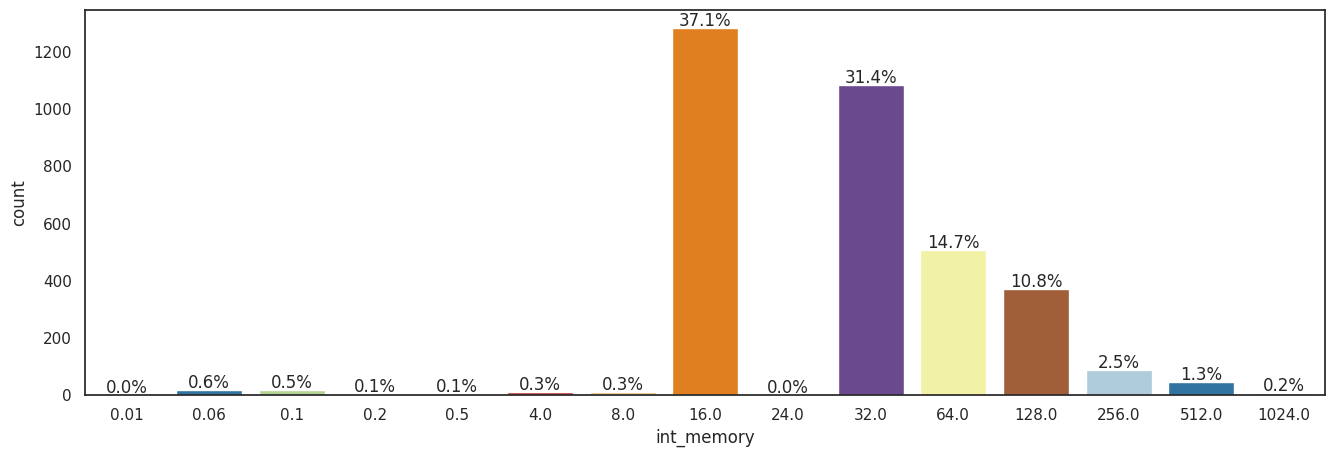

In [78]:
# barplot of int_memory with percentage showing on each bar
labeled_barplot(recell_df_new, 'int_memory', perc=True)

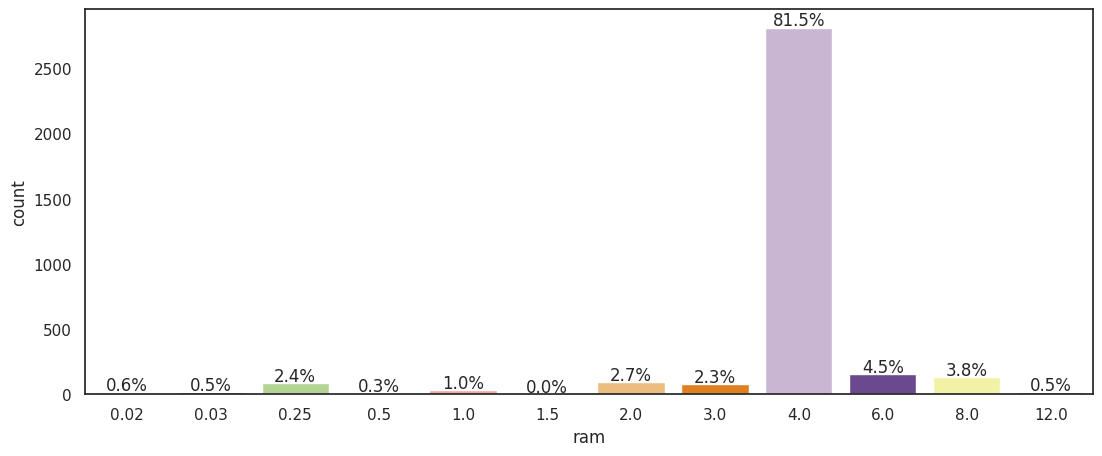

In [79]:
# barplot of RAM with percentage showing on each bar
labeled_barplot(recell_df_new, 'ram', perc=True)

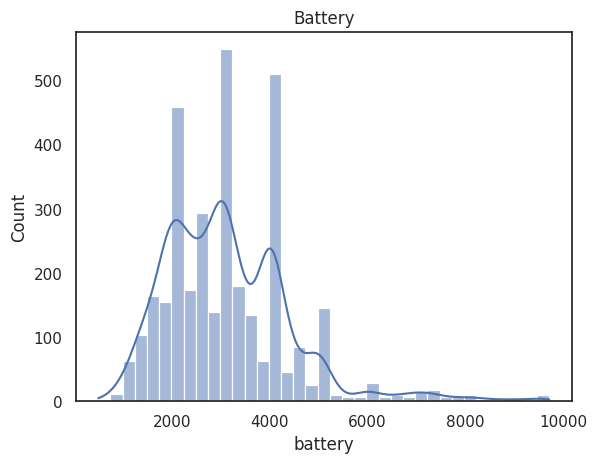

In [80]:
# plot to view distribution of Battery
sns.histplot(data = recell_df_new, x = 'battery',kde=True)
plt.title('Battery')
plt.show()

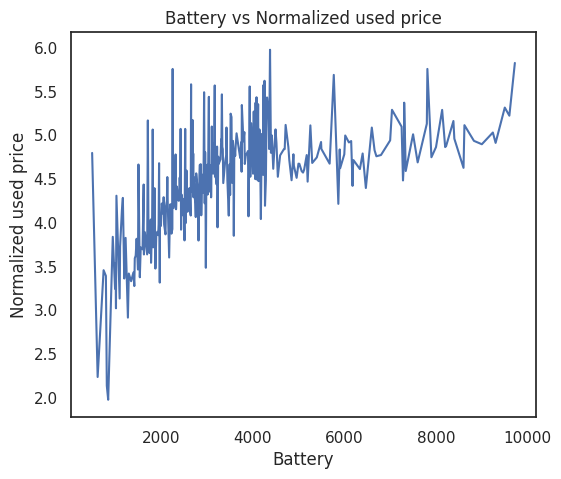

In [81]:
# plot to view distribution between Battery and normalized_used_price
plt.figure(figsize=(6, 5))
sns.lineplot(data = recell_df_new, x = 'battery',y= 'normalized_used_price',errorbar = None)
plt.title('Battery vs Normalized used price')
plt.xlabel('Battery')
plt.ylabel('Normalized used price')
plt.show()

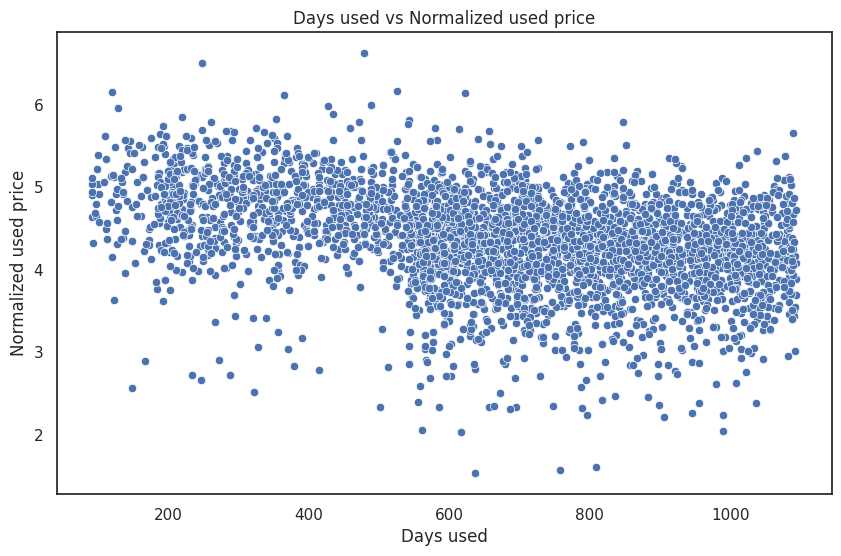

In [82]:
# plot to view distribution between days_used and normalized_used_price
plt.figure(figsize=(10, 6))
sns.scatterplot(data = recell_df_new, x = 'days_used', y = 'normalized_used_price')
plt.title('Days used vs Normalized used price')
plt.xlabel('Days used')
plt.ylabel('Normalized used price')
plt.show()




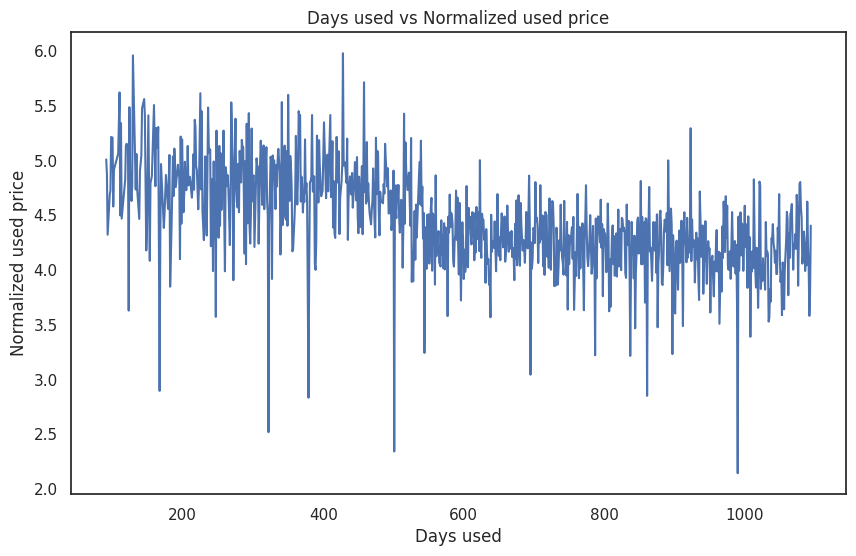

In [83]:
# plot to view trend with days_used and normalized_used_price
plt.figure(figsize=(10, 6))
sns.lineplot(data = recell_df_new, x = 'days_used', y = 'normalized_used_price',errorbar = None)
plt.title('Days used vs Normalized used price')
plt.xlabel('Days used')
plt.ylabel('Normalized used price')
plt.show()

***Observation:***

 - We see that the number of days used increases, the used price generally declines, at certain points price depreciation slow or stabilize. There are few  Outliers, indicates the used devices that retain value despite extensive use.

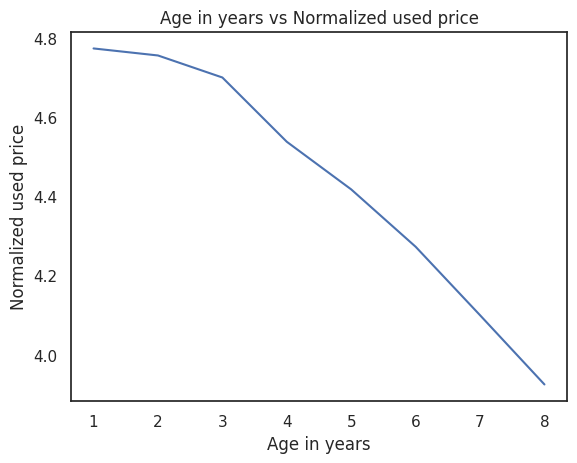

In [84]:
# plot to view distribution between age_in_years and normalized_used_price
sns.lineplot(data = recell_df_new, x = 'age_in_years', y = 'normalized_used_price',errorbar= None)
plt.title('Age in years vs Normalized used price')
plt.xlabel('Age in years')
plt.ylabel('Normalized used price')
plt.show()

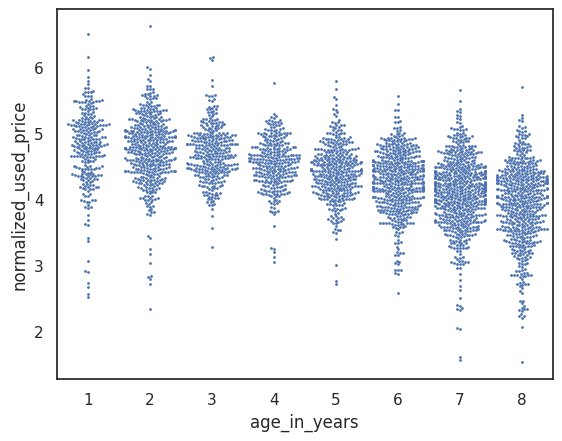

In [85]:
import warnings
warnings.filterwarnings("ignore")
#swarmplot to view distribution between age_in_years and normalized_used_price
sns.swarmplot(data = recell_df_new, x = 'age_in_years', y = 'normalized_used_price',size = 2)
plt.show()

***Observation:***

 - We see the normalized used price decreases as age of the device to the release year increases.

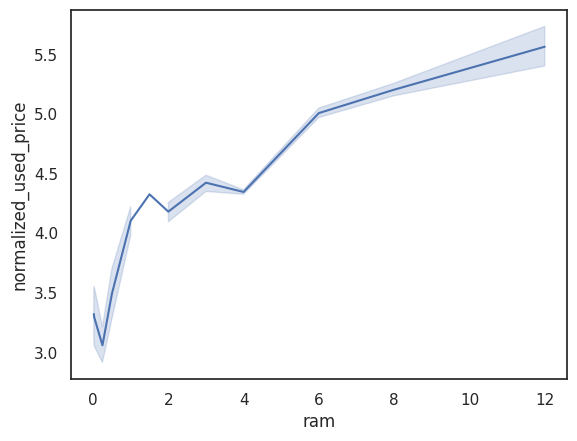

In [86]:
# plot to view distribution between RAM and normalized_used_price
sns.lineplot(data = recell_df_new, x = 'ram', y = 'normalized_used_price')
plt.show()

***Observation:***

 - We see the normalized used price rises as RAM in GB increases.

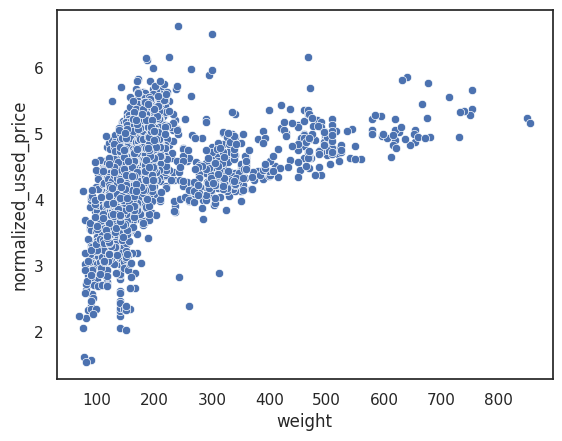

In [87]:
# plot to view the relationship between weight and normalized used price
sns.scatterplot(data = recell_df_new, x = 'weight', y = 'normalized_used_price')
plt.show()


***Observation:***

 - We see the normalized used price rises as weight increases, reaching around 300 gms. Beyond this point, the trend becomes less distinct, with prices displaying a wider range of variation.

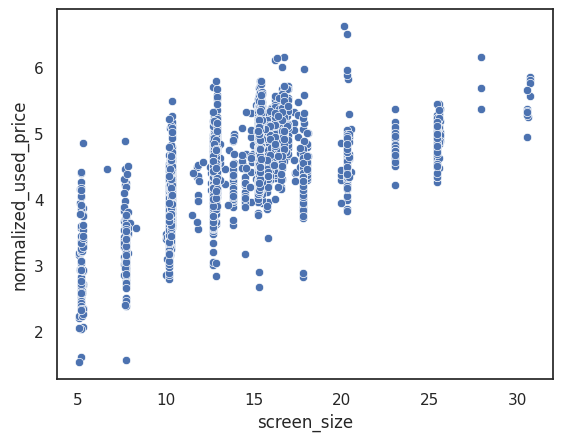

In [88]:
# plot to view the relationship between Screen Size and normalized used price
sns.scatterplot(data = recell_df_new, x = 'screen_size', y = 'normalized_used_price')
plt.show()

***Observation:***

 - We see the normalized used price rises for larger screen sizes, most of the datapoints exists between screen sizes 10-20 inches.

## Model Building - Linear Regression

#####Split the data in to Training and Testing#####

In [89]:
# setting up Independent variables
X = recell_df_new.drop(columns = ['normalized_used_price'], axis = 1)
# setting up dependent variable
y = recell_df_new['normalized_used_price']

#####Add the intercept to the dataset#####

In [90]:
#Adding the intercept to the dataset
X = sm.add_constant(X)

In [91]:
# Split the dataset in to 70% training data and 30% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [92]:
# print the number of rows in training dataset
print(f'There are {X_train.shape[0]} rows in the train dataset')
#print the number of rows in testing dataset
print(f'There are {X_test.shape[0]} rows in the test dataset')

There are 2417 rows in the train dataset
There are 1037 rows in the test dataset


#####Fit the linear regression

In [93]:
ols_reg_model_1 = sm.OLS(y_train.astype(float), X_train.astype(float)).fit()
#print the regression summary
print(ols_reg_model_1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.849
Model:                               OLS   Adj. R-squared:                  0.846
Method:                    Least Squares   F-statistic:                     277.1
Date:                   Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                           05:54:40   Log-Likelihood:                 125.15
No. Observations:                   2417   AIC:                            -152.3
Df Residuals:                       2368   BIC:                             131.4
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


***Observation:***

- In this model_1, we are running all the variables
- We observe R-squared and Adj.R-squared are 0.849 and 0.846 respectively, which means 84% of varation of the dependent variable is explained by the model.
- We also observe, there are some attributes have a p_value > 0.05, indicating that they don't contribute significantly to the model , Therefore we will drop one by one while carefully monitoring R-squared value to ensure minimal impact on model performance.

## Model Performance Check

In [94]:
 # function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute different metrics to check performance of a regression model,
#  model : regressor , predictors: independent variables,target: dependent variable

def model_performance_regression(model, predictors, target):


    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape =  mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            'RMSE': rmse,
            'MAE': mae,
            'R-squared': r2,
            'Adj. R-squared': adjr2,
            'MAPE': mape,
        },
        index=[0],
    )
    df_perf = df_perf.map(lambda x: f'{x:.4f}')

    return df_perf

In [95]:
# Assessing model performance using training set (70% of data)
print('model performance on training dataset')
ols_reg_model_1_train_perf = model_performance_regression(ols_reg_model_1, X_train, y_train)
print(ols_reg_model_1_train_perf )


model performance on training dataset
     RMSE     MAE R-squared Adj. R-squared    MAPE
0  0.2298  0.1785    0.8489         0.8458  4.2937


In [96]:
# Assessing model performance using testing dataset (30% of data)
print('model performance on training dataset')
ols_reg_model_1_test_perf = model_performance_regression(ols_reg_model_1, X_test, y_test)
print(ols_reg_model_1_test_perf )

model performance on training dataset
     RMSE     MAE R-squared Adj. R-squared    MAPE
0  0.2391  0.1887    0.8322         0.8238  4.5133


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

 We will evaluate the following key assumptions of Linear Regression:


1.   **Multicollinearrity :** Ensuring predictor variables are not highly correlated.
2.   **Linearity :** Confirming linear relationship between Independent and dependent variables.
3.   **Independence of Errors :** Checking that residuals are not dependent on each other.
4.   **Normality of Errors :** Verifying that residuals follow a normal distribution.
5.   **No Heteroscedasticity :** Ensuring constant variance of residuals across all levels of independent variable.








#### Test for Multicollinearity

- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [97]:
# create a function to check VIF
def check_vif(predictors):
    vif = pd.DataFrame()
    vif['Features'] = predictors.columns
    predictors = predictors.astype(float)
    vif['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
    return vif

In [98]:
# check VIF on the training dataset
print('VIF on training dataset')
check_vif(X_train)

VIF on training dataset


Features      VIF
0                   const 232.6769
1             screen_size   8.2621
2          main_camera_mp   2.4182
3        selfie_camera_mp   2.8727
4              int_memory   1.3634
5                     ram   2.2835
6                 battery   4.0661
7                  weight   6.4180
8               days_used   2.5803
9    normalized_new_price   3.2187
10           age_in_years   4.8785
11     brand_name_Alcatel   3.4586
12       brand_name_Apple  11.1951
13        brand_name_Asus   3.6528
14  brand_name_BlackBerry   1.6233
15      brand_name_Celkon   1.8737
16     brand_name_Coolpad   1.5754
17      brand_name_Gionee   2.0767
18      brand_name_Google   1.3880
19         brand_name_HTC   3.4603
20       brand_name_Honor   3.5593
21      brand_name_Huawei   6.3958
22     brand_name_Infinix   1.1918
23     brand_name_Karbonn   1.6287
24          brand_name_LG   5.3546
25        brand_name_Lava   1.8260
26      brand_name_Lenovo   4.7052
27       brand_name_Meizu   2.4171
28    brand_name_Micromax   3.7795
29   brand_name_Microsoft   2.0927
30    brand_name_Motorola   3.4875
31       brand_name_Nokia   3.7551
32     brand_name_OnePlus   1.5862
33        brand_name_Oppo   4.2853
34      brand_name_Others  10.8335
35   brand_name_Panasonic   1.8906
36      brand_name_Realme   1.9785
37     brand_name_Samsung   8.0136
38        brand_name_Sony   2.8911
39       brand_name_Spice   1.6385
40        brand_name_Vivo   3.7344
41        brand_name_XOLO   2.1639
42      brand_name_Xiaomi   4.0822
43         brand_name_ZTE   4.3431
44                 4g_yes   2.5435
45                 5g_yes   1.8082
46              os_Others   1.8858
47             os_Windows   1.7427
48                 os_iOS  10.0372

***Observation:***

 - We see few attributes have VIF greater than 10,we move on to remove multicollinearity by dropping the variables one by one also we ensure adjusted R-squared is not much impacted.

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [99]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            'col': high_vif_columns,
            'Adj. R-squared after_dropping col': adj_r2,
            'RMSE after dropping col': rmse,
        }
    ).sort_values(by='Adj. R-squared after_dropping col', ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [100]:
#columns with high VIF
col_list = ['brand_name_Apple',
    'os_iOS',
    'brand_name_Others',
    'brand_name_Samsung',
    'brand_name_Huawei',
    'brand_name_LG']

res = treating_multicollinearity(X_train.astype(float), y_train.astype(float), col_list)
res

col  Adj. R-squared after_dropping col  \
0              os_iOS                             0.8459   
1    brand_name_Apple                             0.8459   
2   brand_name_Huawei                             0.8458   
3       brand_name_LG                             0.8458   
4  brand_name_Samsung                             0.8458   
5   brand_name_Others                             0.8457   

   RMSE after dropping col  
0                   0.2321  
1                   0.2321  
2                   0.2322  
3                   0.2322  
4                   0.2322  
5                   0.2322

In [101]:
col_to_drop = 'brand_name_Huawei'
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = check_vif(X_train2)
print('VIF after dropping', col_to_drop)
vif

VIF after dropping brand_name_Huawei


Features      VIF
0                   const 167.2140
1             screen_size   8.2621
2          main_camera_mp   2.4180
3        selfie_camera_mp   2.8721
4              int_memory   1.3611
5                     ram   2.2826
6                 battery   4.0590
7                  weight   6.4090
8               days_used   2.5799
9    normalized_new_price   3.2184
10           age_in_years   4.8777
11     brand_name_Alcatel   1.4071
12       brand_name_Apple  10.3759
13        brand_name_Asus   1.3887
14  brand_name_BlackBerry   1.1415
15      brand_name_Celkon   1.2937
16     brand_name_Coolpad   1.0920
17      brand_name_Gionee   1.1756
18      brand_name_Google   1.0714
19         brand_name_HTC   1.3842
20       brand_name_Honor   1.3705
21     brand_name_Infinix   1.0434
22     brand_name_Karbonn   1.1374
23          brand_name_LG   1.6402
24        brand_name_Lava   1.1659
25      brand_name_Lenovo   1.5457
26       brand_name_Meizu   1.2108
27    brand_name_Micromax   1.5158
28   brand_name_Microsoft   1.6502
29    brand_name_Motorola   1.3804
30       brand_name_Nokia   1.7524
31     brand_name_OnePlus   1.1110
32        brand_name_Oppo   1.4937
33      brand_name_Others   2.5247
34   brand_name_Panasonic   1.1448
35      brand_name_Realme   1.1824
36     brand_name_Samsung   2.0059
37        brand_name_Sony   1.3274
38       brand_name_Spice   1.1476
39        brand_name_Vivo   1.3968
40        brand_name_XOLO   1.2304
41      brand_name_Xiaomi   1.4504
42         brand_name_ZTE   1.4994
43                 4g_yes   2.5297
44                 5g_yes   1.8081
45              os_Others   1.8856
46             os_Windows   1.7423
47                 os_iOS  10.0367

In [102]:
col_list = ['brand_name_Apple','os_iOS']
res = treating_multicollinearity(X_train2.astype(float), y_train.astype(float), col_list)
res

col  Adj. R-squared after_dropping col  \
0  brand_name_Apple                             0.8458   
1            os_iOS                             0.8458   

   RMSE after dropping col  
0                   0.2321  
1                   0.2321

In [103]:
col_to_drop = 'brand_name_Apple'
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = check_vif(X_train3)
print('VIF after dropping', col_to_drop)
vif

VIF after dropping brand_name_Apple


Features      VIF
0                   const 165.0600
1             screen_size   8.2025
2          main_camera_mp   2.4176
3        selfie_camera_mp   2.8402
4              int_memory   1.3611
5                     ram   2.2722
6                 battery   4.0571
7                  weight   6.4010
8               days_used   2.5794
9    normalized_new_price   3.1995
10           age_in_years   4.8707
11     brand_name_Alcatel   1.4034
12        brand_name_Asus   1.3837
13  brand_name_BlackBerry   1.1347
14      brand_name_Celkon   1.2934
15     brand_name_Coolpad   1.0917
16      brand_name_Gionee   1.1749
17      brand_name_Google   1.0697
18         brand_name_HTC   1.3825
19       brand_name_Honor   1.3666
20     brand_name_Infinix   1.0433
21     brand_name_Karbonn   1.1374
22          brand_name_LG   1.6342
23        brand_name_Lava   1.1659
24      brand_name_Lenovo   1.5415
25       brand_name_Meizu   1.2094
26    brand_name_Micromax   1.5150
27   brand_name_Microsoft   1.6487
28    brand_name_Motorola   1.3782
29       brand_name_Nokia   1.7397
30     brand_name_OnePlus   1.1095
31        brand_name_Oppo   1.4917
32      brand_name_Others   2.5143
33   brand_name_Panasonic   1.1443
34      brand_name_Realme   1.1812
35     brand_name_Samsung   1.9879
36        brand_name_Sony   1.3247
37       brand_name_Spice   1.1475
38        brand_name_Vivo   1.3927
39        brand_name_XOLO   1.2302
40      brand_name_Xiaomi   1.4470
41         brand_name_ZTE   1.4973
42                 4g_yes   2.5295
43                 5g_yes   1.7967
44              os_Others   1.7549
45             os_Windows   1.7407
46                 os_iOS   1.1817

Observation:

 - After dropping the high VIF variables, We observe all the remaining variable have VIF < 5.

In [104]:
# Re-fit the model
olsmod1 = sm.OLS(y_train.astype(float), X_train3.astype(float)).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.849
Model:                               OLS   Adj. R-squared:                  0.846
Method:                    Least Squares   F-statistic:                     289.2
Date:                   Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                           05:55:40   Log-Likelihood:                 124.29
No. Observations:                   2417   AIC:                            -154.6
Df Residuals:                       2370   BIC:                             117.6
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


***Observation:***

 - We observe there is no much impact to the Adjusted R-Square value

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

In [105]:
# initial list of columns
cols = X_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

# Loop to check for p-values of the variables and drop the column with the highest p-value.
while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train3[cols]

    # fitting the model
    model = sm.OLS(y_train.astype(float), X_train_aux.astype(float)).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

# variables with p-values lesser than 0.05
selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'normalized_new_price', 'age_in_years', 'brand_name_Asus', 'brand_name_Celkon', 'brand_name_Nokia', 'brand_name_Xiaomi', '4g_yes', '5g_yes', 'os_Others']


In [106]:
# Using only the variables with p-values less than 0.05 to train model

X_train4 = X_train3[selected_features]
X_test4 = X_test3[selected_features]

In [108]:
# fit OLS() on updated dataset (have no multicollinearity and no insignificant predictors)
olsmod2 = sm.OLS(y_train.astype(float), X_train4.astype(float)).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.846
Method:                    Least Squares   F-statistic:                     833.5
Date:                   Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                           05:56:01   Log-Likelihood:                 113.96
No. Observations:                   2417   AIC:                            -193.9
Df Residuals:                       2400   BIC:                            -95.49
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [109]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, X_train4, y_train)

olsmod2_train_perf

Training Performance



RMSE     MAE R-squared Adj. R-squared    MAPE
0  0.2308  0.1794    0.8475         0.8464  4.3179

In [110]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, X_test4, y_test) ## Complete the code to check performance on test data
olsmod2_test_perf

Test Performance



RMSE     MAE R-squared Adj. R-squared    MAPE
0  0.2383  0.1885    0.8333         0.8305  4.5083

###Test for Linearity and Independence

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [111]:
# create a dataframe with actual, fitted and residual values
recell_df_new_pred = pd.DataFrame()
# Actual Values
recell_df_new_pred['Actual_Values'] = y_train
# Predicted Values
recell_df_new_pred['Fitted_Values'] = olsmod2.fittedvalues
# Residual values
recell_df_new_pred['Residuals'] = olsmod2.resid

recell_df_new_pred.head()

Actual_Values  Fitted_Values  Residuals
1744         4.2620         4.3081    -0.0461
3141         4.1752         3.8589     0.3163
1233         4.1174         4.4298    -0.3124
3046         3.7826         3.8461    -0.0635
2649         3.9819         3.9189     0.0630

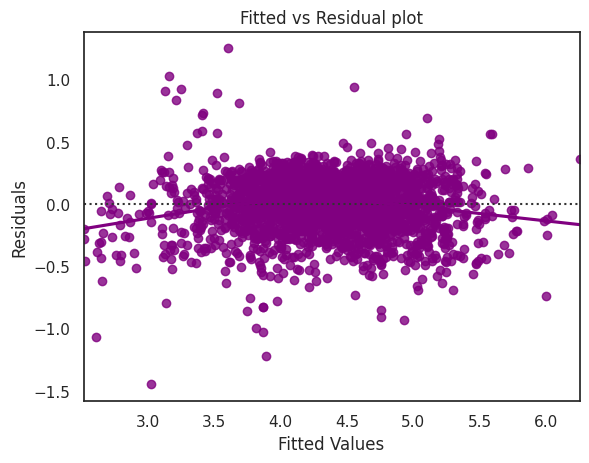

In [112]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=recell_df_new_pred, x="Fitted_Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

***Observation:***

-  we observe there is no pattern between fitted and residuals.This satisfies linearity and Independence.

### Test for Normality

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

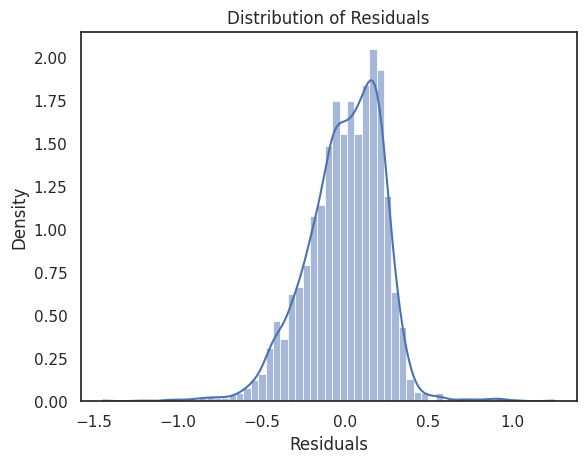

In [113]:
# Plot the normality of Residuals
sns.histplot(
    data=recell_df_new_pred, x="Residuals", kde=True, stat="density"
)
plt.title("Distribution of Residuals")
plt.show()

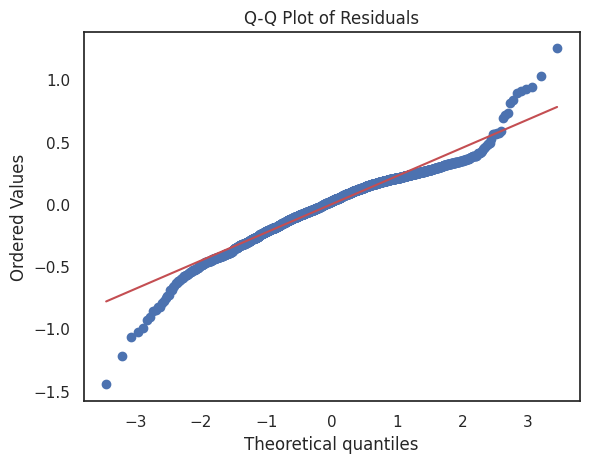

In [114]:
# Q-Q plot of Residuals
import pylab
import scipy.stats as stats
stats.probplot(recell_df_new_pred["Residuals"], dist="norm", plot=pylab)
plt.title("Q-Q Plot of Residuals")
plt.show()

**Observation:**
- Residuals almost follow straight line in QQ Plot.

####Shapiro-Wilk Test

In [115]:
# Shapiro Test for Normality
shapiro_test = stats.shapiro(recell_df_new_pred["Residuals"])
print('P-value of Shapiro_Test :',shapiro_test.pvalue)


P-value of Shapiro_Test : 4.269733206939366e-24


**Observation:**

 - Shapiro-Wilk Test indicates non-normal residuals, as the p-value is below 0.05.However the visual assessment from the distribution plot and Q-Q plot suggests that the residuals closely resemble normal distribution.
 - Therefore the assumption can be considered reasonable satisfied for model validity.

### Test for Homoscedasticity

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [116]:
# import necessary libraries for goldfeldquandt test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(recell_df_new_pred["Residuals"],X_train4.astype(float))
print(lzip(name, test))
print('P-value of Goldfeldquandt Test :',test[1])


[('F statistic', np.float64(0.9386555984655464)), ('p-value', np.float64(0.8626448481134024))]
P-value of Goldfeldquandt Test : 0.8626448481134024


**Observation:**
 - We see the P-value is greater than 0.05, the Residuals are Homoscedastic.So, the assumption is satisfied.

**As all the assumptions of linear regression are satisfied. Let's rebuild our final model, check its performance, and draw inferences from it.**

## Final Model

In [117]:
# Check the model parameters
olsmod2.params

const                   1.3758
screen_size             0.0291
main_camera_mp          0.0232
selfie_camera_mp        0.0120
int_memory              0.0002
ram                     0.0292
battery                -0.0000
weight                  0.0008
normalized_new_price    0.4086
age_in_years           -0.0219
brand_name_Asus         0.0634
brand_name_Celkon      -0.1893
brand_name_Nokia        0.0829
brand_name_Xiaomi       0.0852
4g_yes                  0.0464
5g_yes                 -0.0876
os_Others              -0.0594
dtype: float64

In [118]:
# Let us write the equation of linear regression
Equation = 'price ='
print(Equation, end='  ')
for i in range(len(X_train4.columns)):
    if i == 0:
        print(olsmod2.params.iloc[i], '+', end='  ')
    elif i != len(X_train4.columns) - 1:
        print(
            olsmod2.params.iloc[i],
            '* (',
            X_train4.columns[i],
            ')',
            '+',
            end='  ',
        )
    else:
        print(olsmod2.params.iloc[i], '* (', X_train4.columns[i], ')')

price =  1.3757547399792895 +  0.029121484904840036 * ( screen_size ) +  0.023233709892311 * ( main_camera_mp ) +  0.011984719304973057 * ( selfie_camera_mp ) +  0.00018599321970174347 * ( int_memory ) +  0.02916405071720221 * ( ram ) +  -1.53065393270911e-05 * ( battery ) +  0.0008013295719974433 * ( weight ) +  0.4086135459480888 * ( normalized_new_price ) +  -0.021911217754919124 * ( age_in_years ) +  0.06343580136871683 * ( brand_name_Asus ) +  -0.18930239910181407 * ( brand_name_Celkon ) +  0.08290361908234789 * ( brand_name_Nokia ) +  0.08518390254656463 * ( brand_name_Xiaomi ) +  0.04642107336785013 * ( 4g_yes ) +  -0.08759349863489899 * ( 5g_yes ) +  -0.05936268363039964 * ( os_Others )


In [119]:
# Prediction on test dataset
pred = olsmod2.predict(X_test4)

recell_df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
recell_df_pred_test.sample(10, random_state= 1)


Actual Predicted
1174  4.5538    4.4914
2247  4.3310    4.0984
2991  4.1808    4.0689
2997  4.2910    4.2376
2982  4.6498    4.5073
479   4.2847    4.2252
17    4.7770    4.7141
471   4.7219    4.4852
2918  4.4826    4.5010
602   3.8525    4.1592

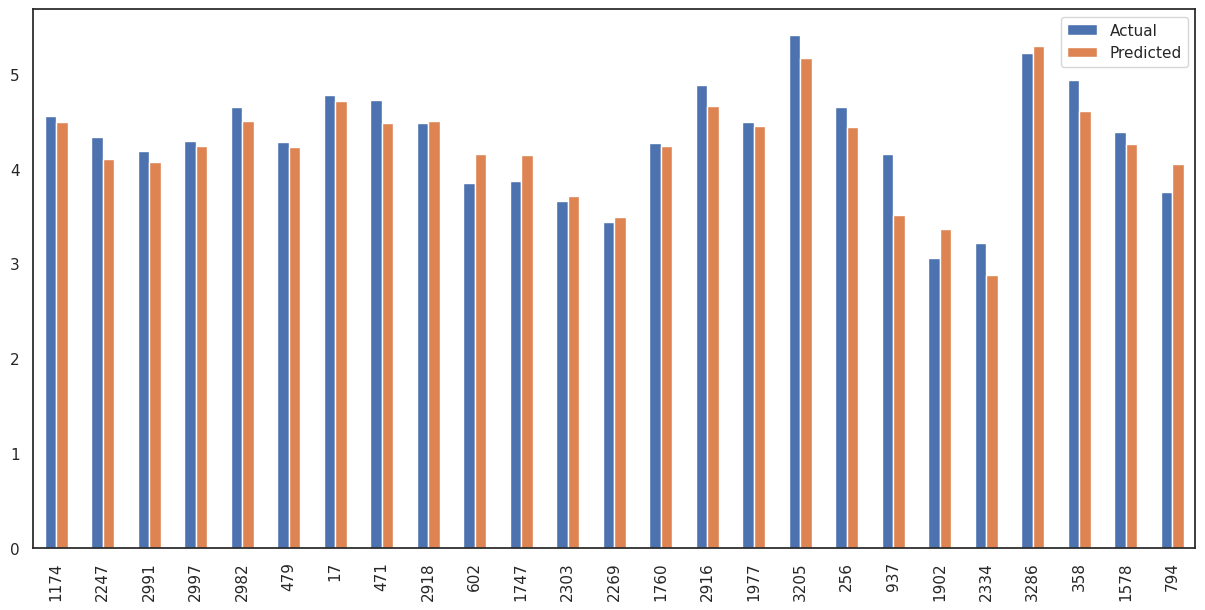

In [120]:
#plot the predicted test dataset
recell_df2 = recell_df_pred_test.sample(25, random_state= 1)
recell_df2.plot(kind="bar", figsize=(15, 7))
plt.show()

In [121]:
# Final modal
ols_reg_model_final = sm.OLS(y_train.astype(float), X_train4.astype(float)).fit()
#print the regression summary
print(ols_reg_model_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.846
Method:                    Least Squares   F-statistic:                     833.5
Date:                   Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                           05:56:57   Log-Likelihood:                 113.96
No. Observations:                   2417   AIC:                            -193.9
Df Residuals:                       2400   BIC:                            -95.49
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [122]:
# Assessing model performance using training set (70% of data)
print('model performance on training dataset')
olsmod2_train_perf = model_performance_regression(olsmod2, X_train4.astype(float), y_train.astype(float))
print(olsmod2_train_perf)


model performance on training dataset
     RMSE     MAE R-squared Adj. R-squared    MAPE
0  0.2308  0.1794    0.8475         0.8464  4.3179


In [123]:
# Assessing model performance using testing dataset (30% of data)
print('model performance on testing dataset')
olsmod2_test_perf = model_performance_regression(olsmod2, X_test4, y_test)
print(olsmod2_test_perf)

model performance on testing dataset
     RMSE     MAE R-squared Adj. R-squared    MAPE
0  0.2383  0.1885    0.8333         0.8305  4.5083


***Observation:***

 - From the Final Model
     - The RMSE  , MAE of train and test  is very close, indicates that the model does not show major signs of overfitting.
     - MAE (Mean Absolute Error) of ~0.23 indicates the model consistently predicts normalized used device prices with minimal deviation ensuring reliable estimations.
     - MAPE (Mean Absolute Percentage Error) of test data ~4.5%, indicates model predictions are highly reliable.
     - The Adjusted R-Squared of train (~ 0.85) and test (~0.83) shows no much difference in variance , indicates model is accurate without major overfitting the train data.
    

## Actionable Insights and Recommendations

**Insights**

 - The predicted model explains 83-85% of the variance, indicates the chosen features contribute significantly to used price prediction.
 - Predictions are close to actual values with an average error of ~0.23 euros.
 - Normalized new price shows 83% correlation with used price, indicates new device cost influences resale price.
 - Screen size, Battery, Selfie camera, main camera shows ~60% correlation, indicates the devices with larger sceensize,better cameras and bigger batteries tend to retain higher resale price.
 - RAM and Release year shows ~50% correlation, indicates the latest brands with higher RAM demand higher used prices.
 - Andriod dominates the used device market (~93%) , the OS has minimal influence in determining resale price.
 - 4G enabled devices dominate the resale value and fewer devices support 5G.

**Recommendations**

 - This model exclusively considers device features and characteristics, it would be recommended for ReCell company to incorporate client related data such as age,income and gender to have deeper insights into customer preferences and price trends.
 - Adding an attribute that distinguishes between device types such as tablets,smartphones , low end devices could be beneficial, as the detected outliers may reflect these categorical differences.
 - To boost revenue ,ReCell could prioritize selling new released models,as they tend to have higher resale values.
 - ReCell could also expand in to used gadgets like smartwatches which may attract specific customer segments.Additionally, focusing on 5G-enabled devices,which generally retain resale value compared to 4G model devices could be advantageous.

___